In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg
stats.f_oneway

<function scipy.stats.stats.f_oneway(*args)>

In [2]:
file = '/yourpath/acqui_703DA.csv'
df = pd.read_csv(file)

In [3]:
#The first 28 rows belong to the old study design and cannot be compared to the rest od the data so it is dropped.

In [4]:
df_prewash = df.drop(df.index[:29])

In [5]:
#Tests solved under 2 minutes include missing data and are not trustworthy sources of information so they are dropped.

In [6]:
df_prewash = df_prewash[df_prewash['Minutes Spent'] >= 2] 

In [7]:
#removed columns irrelevant to the analysis including duplicated time columns

In [8]:
df_clean = df_prewash.drop(["Points", "computerCountry", "device", "startedAt", "Program Version", "in_GCF_description", "in_GCF_risks", "in_GCF_procedures", "in_GCF_duration", "in_GCF_benefits", "out_GCF_failure", "in_GCF_contactInfo", "in_GCF_organization", "GCF_phrase", "Do you consent to participate and agree to these terms? (oo4eyne)", "SAPAscale", "SAPAscaleRev", "startTime", "thescale", "Randomize (9ftsore)", "Randomize (6oma8x0)", "lastAnswer", "Randomize (fnpvha4)", "Randomize (c69afhq)", "Randomize (h85awvq)", "Randomize (ld3r6aa)", "Randomize (slwm5gf)", "In the last 12 months, how many times have you given to charitable causes? (pclk1ce)", "How many times have you showered or bathed last week? (iu9vwoo)", "In the past month, how many times have you been drunk? (yl2hkab)", "Overall in your life, how happy and/or satisfied have you been with your romantic relationships? (4818g5p)", "ScaleRange", "ConstanttoPositive", "o_IQOptions", "Out of 100 random people in the U.S. who are of your own age and gender, how many of those 100 people do you think you would have a higher IQ than? (he7vglh)", "scalePoliticalSelfPosition", "In political matters, where do your views generally fall on the scale from \"left\" (progressive) to \"right\" (conservative)? (htpdci7)", "How much freedom do you have to make your life what you want it to be? (g0wffz8)", "Randomize (jafpx6e)", "Number_of_questions", "How *religious* do you consider yourself to be? (avbney6)", "Compared to other people of your age and gender, how physically healthy are you right now? (fyeuzhc)", "stopTime", "minutesused", "PositivescaleConstant", "Randomize (rn1wsui)", "numberOfQuestions", "in_progressIncrement", "out_progress", "out_progressInt", "in_round", "origInput", "in_floor", "wasNegativeValue", "powerOfTwo", "out_floor", "increase", "out_round", "How many times have you showered or bathed last week? (1nljqpp)", "In the last 12 months, how many times have you given to charitable causes? (5hngl2r)", "satisfaction_scale", "Randomize (2cbixm6)", "In the past month, how many times have you been drunk? (cs7mzrw)", "Randomize (lwpzlt4)"], axis=1)

In [9]:
#impossible values in acquiescence suggests compromised rows so these rows are dropped

In [10]:
df_clean = df_clean[df_clean['acqui'] <= 3] 

In [11]:
df_clean = df_clean[df_clean['acqui'] >= -3] 

In [12]:
df_clean = df_clean.reset_index(drop=True)

In [13]:
df_clean = df_clean.dropna()

In [14]:
df_handy = df_clean[['Minutes Spent', 'Time Started (UTC)', 'age', 'gender', 'education', 'yearOfBirth', 'educationScore', 'householdIncome', 'femaleAs1MaleAs0', 'householdIncomeScore', 'householdIncomeEstimate', 'acqui', 'orderSAPAscale', 'o_TimesGivenToCharity', 'o_NumberOfShowers', 'o_numberOfTimesDrunk', 'o_romanticSatisfaction', 'o_IQSelfRatingPercentile', 'o_politicsLeftToRight', 'o_personalAutonomy', 'o_SatisfactionWithLife', 'o_religiousness', 'o_PhysicalHealth', 'agreeableness_total', 'extraversion_total', 'neuroticism_total', 'conscientiousness_total', 'openness_total', 'Time Finished (UTC)', 'agreeToDisagreeScaleOrder']]

In [15]:
print(df_handy.describe())

       Minutes Spent         age  yearOfBirth  educationScore  \
count     703.000000  703.000000   703.000000      703.000000   
mean        6.723058   39.220484  1980.779516        4.344239   
std         4.508222   11.591383    11.591383        1.382993   
min         2.000000   20.000000  1941.000000        1.000000   
25%         4.300000   30.000000  1974.000000        4.000000   
50%         5.480000   36.000000  1984.000000        5.000000   
75%         7.510000   46.000000  1990.000000        5.000000   
max        42.730000   79.000000  2000.000000        8.000000   

       femaleAs1MaleAs0  householdIncomeScore  householdIncomeEstimate  \
count        703.000000            703.000000               703.000000   
mean           0.452347              3.260313             62076.813656   
std            0.517711              1.690160             39911.098715   
min            0.000000              0.000000              4500.000000   
25%            0.000000              2.00000

In [16]:
df_handy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 711
Data columns (total 30 columns):
Minutes Spent                703 non-null float64
Time Started (UTC)           703 non-null object
age                          703 non-null float64
gender                       703 non-null object
education                    703 non-null object
yearOfBirth                  703 non-null float64
educationScore               703 non-null float64
householdIncome              703 non-null object
femaleAs1MaleAs0             703 non-null float64
householdIncomeScore         703 non-null float64
householdIncomeEstimate      703 non-null float64
acqui                        703 non-null float64
orderSAPAscale               703 non-null float64
o_TimesGivenToCharity        703 non-null float64
o_NumberOfShowers            703 non-null float64
o_numberOfTimesDrunk         703 non-null float64
o_romanticSatisfaction       703 non-null float64
o_IQSelfRatingPercentile     703 non-null float64

In [17]:
df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='FixedQuestions'].count()

Minutes Spent                240
Time Started (UTC)           240
age                          240
gender                       240
education                    240
                            ... 
easyGoingness                240
emotionalStability           240
conservatism                 240
Time Finished (UTC)          240
agreeToDisagreeScaleOrder    240
Length: 184, dtype: int64

In [18]:
df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='OrganisedbyBi5Questions'].count()

Minutes Spent                232
Time Started (UTC)           232
age                          232
gender                       232
education                    232
                            ... 
easyGoingness                232
emotionalStability           232
conservatism                 232
Time Finished (UTC)          232
agreeToDisagreeScaleOrder    232
Length: 184, dtype: int64

In [19]:
df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='RandomisedQuestions'].count()

Minutes Spent                231
Time Started (UTC)           231
age                          231
gender                       231
education                    231
                            ... 
easyGoingness                231
emotionalStability           231
conservatism                 231
Time Finished (UTC)          231
agreeToDisagreeScaleOrder    231
Length: 184, dtype: int64

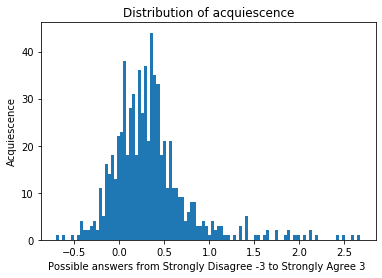

In [20]:
plt.hist(df_clean['acqui'], bins=100)
plt.xlabel('Possible answers from Strongly Disagree -3 to Strongly Agree 3 ')
plt.ylabel('Acquiescence')
plt.title('Distribution of acquiescence')
plt.show()

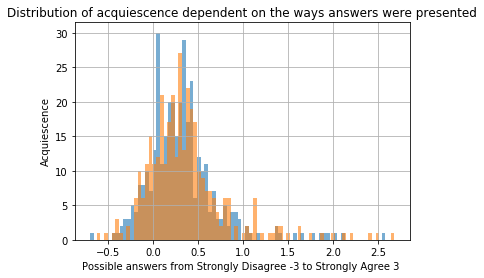

In [21]:
df_clean.groupby(['agreeToDisagreeScaleOrder'])['acqui'].hist(bins=80, alpha=0.6, label='agreeToDisagreeScaleOrder')

plt.xlabel('Possible answers from Strongly Disagree -3 to Strongly Agree 3 ')
plt.ylabel('Acquiescence')
plt.title('Distribution of acquiescence dependent on the ways answers were presented')
plt.legend()
plt.show()

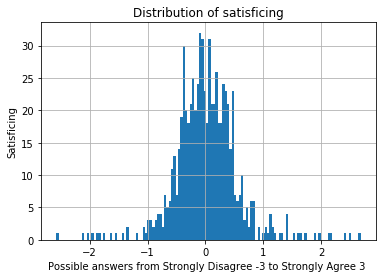

In [22]:
df_clean['orderSAPAscale'].hist(bins=130)
plt.xlabel('Possible answers from Strongly Disagree -3 to Strongly Agree 3 ')
plt.ylabel('Satisficing')
plt.title('Distribution of satisficing')
plt.show()

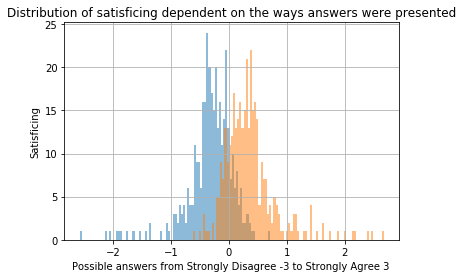

In [23]:
df_clean.groupby(['agreeToDisagreeScaleOrder'])['orderSAPAscale'].hist(bins=90, alpha=0.5)
plt.xlabel('Possible answers from Strongly Disagree -3 to Strongly Agree 3 ')
plt.ylabel('Satisficing')
plt.title('Distribution of satisficing dependent on the ways answers were presented')
plt.legend()
plt.show()

In [24]:
df_clean.groupby('agreeToDisagreeScaleOrder')['acqui'].agg([np.mean, np.std, np.var])

mean       std       var
agreeToDisagreeScaleOrder                              
0.0                        0.321751  0.405141  0.164140
1.0                        0.358879  0.456721  0.208594

In [25]:
a1 = df_handy[df_handy['agreeToDisagreeScaleOrder']==0]['acqui']
a2 = df_handy[df_handy['agreeToDisagreeScaleOrder']==1]['acqui']
stats.ttest_ind(a1, a2, equal_var = True)

Ttest_indResult(statistic=-1.140937666881831, pvalue=0.2542854870975348)

In [26]:
df_handy.groupby('agreeToDisagreeScaleOrder')['orderSAPAscale'].agg([np.mean, np.std, np.var])

mean       std       var
agreeToDisagreeScaleOrder                              
0.0                       -0.321751  0.405141  0.164140
1.0                        0.358879  0.456721  0.208594

In [27]:
o1 = df_handy[df_handy['agreeToDisagreeScaleOrder']==0]['orderSAPAscale']
o2 = df_handy[df_handy['agreeToDisagreeScaleOrder']==1]['orderSAPAscale']
stats.ttest_ind(o1, o2, equal_var = True)

Ttest_indResult(statistic=-20.915638622696196, pvalue=7.411197301512068e-76)

In [28]:
#slicing questions to correlate

In [29]:
df_to_correlate = df_clean.iloc[:,45:129]

In [30]:
df_to_correlate.iloc[:, 2:].astype(float)

I cheat to get ahead. (g8dq9qq)  I tell a lot of lies. (pmfh5cg)  \
0                               -3.0                             -3.0   
1                                1.0                              1.0   
2                               -3.0                             -3.0   
3                               -1.0                             -2.0   
4                               -3.0                             -3.0   
..                               ...                              ...   
707                              3.0                              1.0   
708                              1.0                              1.0   
709                              2.0                              3.0   
710                              1.0                              1.0   
711                             -3.0                             -3.0   

     I am just an ordinary person. (n9bhd2h)  \
0                                       -3.0   
1                                        2.0   
2                                        2.0   
3                                        2.0   
4                                        2.0   
..                                       ...   
707                                      1.0   
708                                      2.0   
709                                     -1.0   
710                                     -2.0   
711                                      3.0   

     I sympathize with others' feelings. (q9xfj56)  \
0                                              3.0   
1                                              2.0   
2                                              2.0   
3                                             -1.0   
4                                              2.0   
..                                             ...   
707                                            1.0   
708                                            1.0   
709                                           -3.0   
710                                            1.0   
711                                            2.0   

     I trust people to mainly tell the truth. (6d4bydc)  \
0                                                  1.0    
1                                                  3.0    
2                                                 -3.0    
3                                                  1.0    
4                                                  1.0    
..                                                 ...    
707                                                2.0    
708                                               -1.0    
709                                               -1.0    
710                                               -2.0    
711                                                3.0    

     I am concerned about others. (n7rx6ps)  \
0                                       3.0   
1                                       2.0   
2                                       2.0   
3                                      -1.0   
4                                       2.0   
..                                      ...   
707                                     2.0   
708                                    -1.0   
709                                     2.0   
710                                     1.0   
711                                     2.0   

     I believe that others have good intentions. (shh948o)  \
0                                                  1.0       
1                                                 -1.0       
2                                                 -3.0       
3                                                  1.0       
4                                                  1.0       
..                                                 ...       
707                                                1.0       
708                                               -1.0       
709                                                1.0       
710     

In [31]:
#correlation of all questions

In [32]:
df_c = df_to_correlate.groupby(['Experiment (Acquiescence)', 'Experiment (SAPA_with_reorganised_questions)']).corr()

In [33]:
#slicing conditions

In [34]:
df_agree_fixed = df_c[:81]

In [35]:
#dividing the main df into 10 dfs - positive and negative subscale each

In [36]:

df_agree_fixed_agreeableness_p = df_agree_fixed[['I sympathize with others\' feelings. (q9xfj56)', 'I trust people to mainly tell the truth. (6d4bydc)', 
'I am concerned about others. (n7rx6ps)', 'I believe that others have good intentions. (shh948o)', 
'I am sensitive to the needs of others. (t9htjwb)', 
'I trust what people say. (q5k6b5d)']]

df_agree_fixed_agreeableness_n = df_agree_fixed[['I cheat to get ahead. (g8dq9qq)', 
'I tell a lot of lies. (pmfh5cg)']]

df_agree_fixed_extraversion_p = df_agree_fixed[['I usually like to spend my free time with people. (fc2rz2n)',
'I express myself easily. (864u5r4)', 
'I laugh aloud. (x16d272)', 'I make myself the center of attention. (2tcqu2r)',
'I laugh a lot. (1j4vfcl)', 'I am skilled in handling social situations. (okn499)']]

df_agree_fixed_extraversion_n = df_agree_fixed[['I want to be left alone. (25aycmp)', 'I avoid company. (ceccqns)', 'I dislike being the center of attention. (6kqf7h7)',
'I hate being the center of attention. (pcr11v9)']]

df_agree_fixed_openness = df_agree_fixed[['I spend time reflecting on things. (z56jbw8)', 
'I am an original thinker. (jiecrzo)',
'I love to reflect on things. (iggdg0b)', 'I am full of ideas. (uuk3w2t)', 
'I am able to come up with new and different ideas. (ggr2q7k)', 'I am quick to understand things. (rl4rcx1)', 
'I rebel against authority. (qbtw713)']]

df_agree_fixed_conscientiousness_p = df_agree_fixed[['I try to follow the rules. (ta1bpqm)',
'I start tasks right away. (nbalxaj)', 'I continue until everything is perfect. (3ebrn73)',
'I want every detail taken care of. (up613ym)',
'I keep things tidy. (rx6yzwq)']]

df_agree_fixed_conscientiousness_n = df_agree_fixed[['I leave a mess in my room. (8v6ibu9)',
'I often forget to put things back in their proper place (4w1kfqh)', 'I need a push to get started. (etpuami)',
'I find it difficult to get down to work. (rx45po3)']]

df_agree_fixed_neuroticism_p = df_agree_fixed[['I seldom get mad. (w3o01c5)']]

df_agree_fixed_neuroticism_n = df_agree_fixed[['I worry about things. (9ifdsda)',
'I get overwhelmed by emotions. (mn0ikcn)', 'I feel a sense of worthlessness or hopelessness. (dudvu8f)',
'I would call myself a nervous person. (enc941h)', 'I experience my emotions intensly. (jxh3egf)',
'I dislike myself. (fmi1p39)', 'I am a worrier. (e6a6mwn)']]

In [37]:
df_agree_fixed_agreeableness_corr_p = pg.cronbach_alpha(data=df_agree_fixed_agreeableness_p)

df_agree_fixed_agreeableness_corr_n = pg.cronbach_alpha(data=df_agree_fixed_agreeableness_n)

df_agree_fixed_conscientiousness_corr_p = pg.cronbach_alpha(data=df_agree_fixed_conscientiousness_p)

df_agree_fixed_conscientiousness_corr_n = pg.cronbach_alpha(data=df_agree_fixed_conscientiousness_n)

df_agree_fixed_neuroticism_corr = pg.cronbach_alpha(data=df_agree_fixed_neuroticism)

df_agree_fixed_openness_corr = pg.cronbach_alpha(data=df_agree_fixed_openness)

df_agree_fixed_extraversion_corr_p = pg.cronbach_alpha(data=df_agree_fixed_extraversion_p)

df_agree_fixed_extraversion_corr_n = pg.cronbach_alpha(data=df_agree_fixed_extraversion_n)

NameError: name 'df_agree_fixed_neuroticism' is not defined

In [ ]:
print(df_agree_fixed_agreeableness_corr_p, df_agree_fixed_agreeableness_corr_n, 
      df_agree_fixed_conscientiousness_corr_p, df_agree_fixed_conscientiousness_corr_n, 
      df_agree_fixed_neuroticism_corr, 
      df_agree_fixed_openness_corr, df_agree_fixed_extraversion_corr_p, 
      df_agree_fixed_extraversion_corr_n)

In [74]:
df_agree_fixed_agreeableness_corr = (0.95 + 0.91)/2
df_agree_fixed_conscientiousness_corr = (0.81 + 0.98)/2
df_agree_fixed_neuroticism_corr = 0.88
df_agree_fixed_openness_corr = 0.91
df_agree_fixed_extraversion_corr = (0.93 + 0.97)/2

In [75]:
print(df_agree_fixed_agreeableness_corr, df_agree_fixed_conscientiousness_corr,
df_agree_fixed_neuroticism_corr, df_agree_fixed_openness_corr, df_agree_fixed_extraversion_corr)

0.9299999999999999 0.895 0.88 0.91 0.95


In [76]:
df_agree_organised = df_c[81:162]

In [77]:

df_agree_organised_agreeableness_p = df_agree_organised[['I sympathize with others\' feelings. (q9xfj56)', 'I trust people to mainly tell the truth. (6d4bydc)', 
'I am concerned about others. (n7rx6ps)', 'I believe that others have good intentions. (shh948o)', 
'I am sensitive to the needs of others. (t9htjwb)', 
'I trust what people say. (q5k6b5d)']]

df_agree_organised_agreeableness_n = df_agree_organised[['I cheat to get ahead. (g8dq9qq)', 
'I tell a lot of lies. (pmfh5cg)']]

df_agree_organised_extraversion_p = df_agree_organised[['I usually like to spend my free time with people. (fc2rz2n)',
'I express myself easily. (864u5r4)', 
'I laugh aloud. (x16d272)', 'I make myself the center of attention. (2tcqu2r)',
'I laugh a lot. (1j4vfcl)', 'I am skilled in handling social situations. (okn499)']]

df_agree_organised_extraversion_n = df_agree_organised[['I want to be left alone. (25aycmp)', 'I avoid company. (ceccqns)', 'I dislike being the center of attention. (6kqf7h7)',
'I hate being the center of attention. (pcr11v9)']]

df_agree_organised_openness = df_agree_organised[['I spend time reflecting on things. (z56jbw8)', 
'I am an original thinker. (jiecrzo)',
'I love to reflect on things. (iggdg0b)', 'I am full of ideas. (uuk3w2t)', 
'I am able to come up with new and different ideas. (ggr2q7k)', 'I am quick to understand things. (rl4rcx1)', 
'I rebel against authority. (qbtw713)']]

df_agree_organised_conscientiousness_p = df_agree_organised[['I try to follow the rules. (ta1bpqm)',
'I start tasks right away. (nbalxaj)', 'I continue until everything is perfect. (3ebrn73)',
'I want every detail taken care of. (up613ym)',
'I keep things tidy. (rx6yzwq)']]

df_agree_organised_conscientiousness_n = df_agree_organised[['I leave a mess in my room. (8v6ibu9)',
'I often forget to put things back in their proper place (4w1kfqh)', 'I need a push to get started. (etpuami)',
'I find it difficult to get down to work. (rx45po3)']]

df_agree_organised_neuroticism = df_agree_organised[['I worry about things. (9ifdsda)',
'I get overwhelmed by emotions. (mn0ikcn)', 'I feel a sense of worthlessness or hopelessness. (dudvu8f)',
'I would call myself a nervous person. (enc941h)', 'I experience my emotions intensly. (jxh3egf)',
'I dislike myself. (fmi1p39)', 'I am a worrier. (e6a6mwn)']]

In [78]:
df_agree_organised_agreeableness_corr_p = pg.cronbach_alpha(data=df_agree_organised_agreeableness_p)

df_agree_organised_agreeableness_corr_n = pg.cronbach_alpha(data=df_agree_organised_agreeableness_n)

df_agree_organised_conscientiousness_corr_p = pg.cronbach_alpha(data=df_agree_organised_conscientiousness_p)

df_agree_organised_conscientiousness_corr_n = pg.cronbach_alpha(data=df_agree_organised_conscientiousness_n)

df_agree_organised_neuroticism_corr = pg.cronbach_alpha(data=df_agree_organised_neuroticism)

df_agree_organised_openness_corr = pg.cronbach_alpha(data=df_agree_organised_openness)

df_agree_organised_extraversion_corr_p = pg.cronbach_alpha(data=df_agree_organised_extraversion_p)

df_agree_organised_extraversion_corr_n = pg.cronbach_alpha(data=df_agree_organised_extraversion_n)

In [79]:
print(df_agree_organised_agreeableness_corr_p, df_agree_organised_agreeableness_corr_n, 
      df_agree_organised_conscientiousness_corr_p, df_agree_organised_conscientiousness_corr_n, 
      df_agree_organised_neuroticism_corr, df_agree_organised_openness_corr, df_agree_organised_extraversion_corr_p, 
      df_agree_organised_extraversion_corr_n)

(0.94864283591311, array([0.929, 0.964])) (0.9716568344060776, array([0.956, 0.982])) (0.8922243323268872, array([0.85 , 0.925])) (0.9790682583233601, array([0.97 , 0.986])) (0.9605585988189239, array([0.946, 0.972])) (0.9289093096970721, array([0.902, 0.95 ])) (0.9324642561233429, array([0.907, 0.953])) (0.9099220822587097, array([0.873, 0.938]))


In [80]:
df_agree_organised_agreeableness_corr = (0.95 + 0.97)/2
df_agree_organised_conscientiousness_corr = (0.89 + 0.98)/2
df_agree_organised_neuroticism_corr = 0.96
df_agree_organised_openness_corr = 0.93
df_agree_organised_extraversion_corr = (0.93 + 0.91)/2

In [81]:
print(df_agree_organised_agreeableness_corr, df_agree_organised_conscientiousness_corr, 
df_agree_organised_neuroticism_corr, df_agree_organised_openness_corr, df_agree_organised_extraversion_corr)

0.96 0.935 0.96 0.93 0.92


In [82]:
df_agree_random = df_c[162:243]

In [83]:
df_agree_random_agreeableness_p = df_agree_random[['I sympathize with others\' feelings. (q9xfj56)', 'I trust people to mainly tell the truth. (6d4bydc)', 
'I am concerned about others. (n7rx6ps)', 'I believe that others have good intentions. (shh948o)', 
'I am sensitive to the needs of others. (t9htjwb)', 
'I trust what people say. (q5k6b5d)']]

df_agree_random_agreeableness_n = df_agree_random[['I cheat to get ahead. (g8dq9qq)', 
'I tell a lot of lies. (pmfh5cg)']]

df_agree_random_extraversion_p = df_agree_random[['I usually like to spend my free time with people. (fc2rz2n)',
'I express myself easily. (864u5r4)', 
'I laugh aloud. (x16d272)', 'I make myself the center of attention. (2tcqu2r)',
'I laugh a lot. (1j4vfcl)', 'I am skilled in handling social situations. (okn499)']]

df_agree_random_extraversion_n = df_agree_random[['I want to be left alone. (25aycmp)', 'I avoid company. (ceccqns)', 'I dislike being the center of attention. (6kqf7h7)',
'I hate being the center of attention. (pcr11v9)']]

df_agree_random_openness = df_agree_random[['I spend time reflecting on things. (z56jbw8)', 
'I am an original thinker. (jiecrzo)',
'I love to reflect on things. (iggdg0b)', 'I am full of ideas. (uuk3w2t)', 
'I am able to come up with new and different ideas. (ggr2q7k)', 'I am quick to understand things. (rl4rcx1)', 
'I rebel against authority. (qbtw713)']]

df_agree_random_conscientiousness_p = df_agree_random[['I try to follow the rules. (ta1bpqm)',
'I start tasks right away. (nbalxaj)', 'I continue until everything is perfect. (3ebrn73)',
'I want every detail taken care of. (up613ym)',
'I keep things tidy. (rx6yzwq)']]

df_agree_random_conscientiousness_n = df_agree_random[['I leave a mess in my room. (8v6ibu9)',
'I often forget to put things back in their proper place (4w1kfqh)', 'I need a push to get started. (etpuami)',
'I find it difficult to get down to work. (rx45po3)']]

df_agree_random_neuroticism = df_agree_random[['I worry about things. (9ifdsda)',
'I get overwhelmed by emotions. (mn0ikcn)', 'I feel a sense of worthlessness or hopelessness. (dudvu8f)',
'I would call myself a nervous person. (enc941h)', 'I experience my emotions intensly. (jxh3egf)',
'I dislike myself. (fmi1p39)', 'I am a worrier. (e6a6mwn)']]

In [84]:
df_agree_random_agreeableness_corr_p = pg.cronbach_alpha(data=df_agree_random_agreeableness_p)

df_agree_random_agreeableness_corr_n = pg.cronbach_alpha(data=df_agree_random_agreeableness_n)

df_agree_random_conscientiousness_corr_p = pg.cronbach_alpha(data=df_agree_random_conscientiousness_p)

df_agree_random_conscientiousness_corr_n = pg.cronbach_alpha(data=df_agree_random_conscientiousness_n)

df_agree_random_neuroticism_corr = pg.cronbach_alpha(data=df_agree_random_neuroticism)

df_agree_random_openness_corr = pg.cronbach_alpha(data=df_agree_random_openness)

df_agree_random_extraversion_corr_p = pg.cronbach_alpha(data=df_agree_random_extraversion_p)

df_agree_random_extraversion_corr_n = pg.cronbach_alpha(data=df_agree_random_extraversion_n)

In [85]:
print(df_agree_random_agreeableness_corr_p, df_agree_random_agreeableness_corr_n, 
      df_agree_random_conscientiousness_corr_p, df_agree_random_conscientiousness_corr_n, 
      df_agree_random_neuroticism_corr, df_agree_random_openness_corr, df_agree_random_extraversion_corr_p, 
      df_agree_random_extraversion_corr_n)

(0.9511039952843149, array([0.933, 0.966])) (0.9558017595923283, array([0.931, 0.972])) (0.9188851469190438, array([0.887, 0.944])) (0.9571269262181762, array([0.94 , 0.971])) (0.9619521372099447, array([0.948, 0.973])) (0.8715705604404799, array([0.824, 0.91 ])) (0.9424188993034571, array([0.921, 0.96 ])) (0.9276892287668508, array([0.898, 0.95 ]))


In [86]:
df_agree_random_agreeableness_corr = (0.95 + 0.96)/2
df_agree_random_conscientiousness_corr = (0.92 + 0.96)/2
df_agree_random_neuroticism_corr = 0.96
df_agree_random_openness_corr = 0.87
df_agree_random_extraversion_corr = (0.94 + 0.93)/2

In [87]:
print(df_agree_random_agreeableness_corr, df_agree_random_conscientiousness_corr,
df_agree_random_neuroticism_corr, df_agree_random_openness_corr, df_agree_random_extraversion_corr)

0.955 0.94 0.96 0.87 0.935


In [88]:
df_disagree_fixed = df_c[243:324]

In [89]:

df_disagree_fixed_agreeableness_p = df_disagree_fixed[['I sympathize with others\' feelings. (q9xfj56)', 'I trust people to mainly tell the truth. (6d4bydc)', 
'I am concerned about others. (n7rx6ps)', 'I believe that others have good intentions. (shh948o)', 
'I am sensitive to the needs of others. (t9htjwb)', 
'I trust what people say. (q5k6b5d)']]

df_disagree_fixed_agreeableness_n = df_disagree_fixed[['I cheat to get ahead. (g8dq9qq)', 
'I tell a lot of lies. (pmfh5cg)']]

df_disagree_fixed_extraversion_p = df_disagree_fixed[['I usually like to spend my free time with people. (fc2rz2n)',
'I express myself easily. (864u5r4)', 
'I laugh aloud. (x16d272)', 'I make myself the center of attention. (2tcqu2r)',
'I laugh a lot. (1j4vfcl)', 'I am skilled in handling social situations. (okn499)']]

df_disagree_fixed_extraversion_n = df_disagree_fixed[['I want to be left alone. (25aycmp)', 'I avoid company. (ceccqns)', 'I dislike being the center of attention. (6kqf7h7)',
'I hate being the center of attention. (pcr11v9)']]

df_disagree_fixed_openness = df_disagree_fixed[['I spend time reflecting on things. (z56jbw8)', 
'I am an original thinker. (jiecrzo)',
'I love to reflect on things. (iggdg0b)', 'I am full of ideas. (uuk3w2t)', 
'I am able to come up with new and different ideas. (ggr2q7k)', 'I am quick to understand things. (rl4rcx1)', 
'I rebel against authority. (qbtw713)']]

df_disagree_fixed_conscientiousness_p = df_disagree_fixed[['I try to follow the rules. (ta1bpqm)',
'I start tasks right away. (nbalxaj)', 'I continue until everything is perfect. (3ebrn73)',
'I want every detail taken care of. (up613ym)',
'I keep things tidy. (rx6yzwq)']]

df_disagree_fixed_conscientiousness_n = df_disagree_fixed[['I leave a mess in my room. (8v6ibu9)',
'I often forget to put things back in their proper place (4w1kfqh)', 'I need a push to get started. (etpuami)',
'I find it difficult to get down to work. (rx45po3)']]

df_disagree_fixed_neuroticism = df_disagree_fixed[['I worry about things. (9ifdsda)',
'I get overwhelmed by emotions. (mn0ikcn)', 'I feel a sense of worthlessness or hopelessness. (dudvu8f)',
'I would call myself a nervous person. (enc941h)', 'I experience my emotions intensly. (jxh3egf)',
'I dislike myself. (fmi1p39)', 'I am a worrier. (e6a6mwn)']]

In [90]:
df_disagree_fixed_agreeableness_corr_p = pg.cronbach_alpha(data=df_disagree_fixed_agreeableness_p)

df_disagree_fixed_agreeableness_corr_n = pg.cronbach_alpha(data=df_disagree_fixed_agreeableness_n)

df_disagree_fixed_conscientiousness_corr_p = pg.cronbach_alpha(data=df_disagree_fixed_conscientiousness_p)

df_disagree_fixed_conscientiousness_corr_n = pg.cronbach_alpha(data=df_disagree_fixed_conscientiousness_n)

df_disagree_fixed_neuroticism_corr = pg.cronbach_alpha(data=df_disagree_fixed_neuroticism)

df_disagree_fixed_openness_corr = pg.cronbach_alpha(data=df_disagree_fixed_openness)

df_disagree_fixed_extraversion_corr_p = pg.cronbach_alpha(data=df_disagree_fixed_extraversion_p)

df_disagree_fixed_extraversion_corr_n = pg.cronbach_alpha(data=df_disagree_fixed_extraversion_n)

In [91]:
print(df_disagree_fixed_agreeableness_corr_p, df_disagree_fixed_agreeableness_corr_n, 
      df_disagree_fixed_conscientiousness_corr_p, df_disagree_fixed_conscientiousness_corr_n, 
      df_disagree_fixed_neuroticism_corr, df_disagree_fixed_openness_corr, df_disagree_fixed_extraversion_corr_p, 
      df_disagree_fixed_extraversion_corr_n)

(0.9117699199269189, array([0.878, 0.939])) (0.9475271281139244, array([0.918, 0.966])) (0.6570926785868731, array([0.523, 0.762])) (0.9201743393909396, array([0.887, 0.945])) (0.9606728546329338, array([0.946, 0.972])) (0.9041181290151938, array([0.868, 0.933])) (0.94849321361826, array([0.929, 0.964])) (0.9689141654159845, array([0.956, 0.979]))


In [92]:
df_disagree_fixed_agreeableness_corr = (0.91 + 0.95)/2
df_disagree_fixed_conscientiousness_corr = (0.66 + 0.92)/2
df_disagree_fixed_neuroticism_corr = 0.96
df_disagree_fixed_openness_corr = 0.9
df_disagree_fixed_extraversion_corr = (0.95 + 0.97)/2

In [93]:
print(df_disagree_fixed_agreeableness_corr, df_disagree_fixed_conscientiousness_corr,
df_disagree_fixed_neuroticism_corr, df_disagree_fixed_openness_corr, df_disagree_fixed_extraversion_corr)

0.9299999999999999 0.79 0.96 0.9 0.96


In [94]:
df_disagree_organised = df_c[324:405]

In [95]:
df_disagree_organised_agreeableness_p = df_disagree_organised[['I sympathize with others\' feelings. (q9xfj56)', 'I trust people to mainly tell the truth. (6d4bydc)', 
'I am concerned about others. (n7rx6ps)', 'I believe that others have good intentions. (shh948o)', 
'I am sensitive to the needs of others. (t9htjwb)', 
'I trust what people say. (q5k6b5d)']]

df_disagree_organised_agreeableness_n = df_disagree_organised[['I cheat to get ahead. (g8dq9qq)', 
'I tell a lot of lies. (pmfh5cg)']]

df_disagree_organised_extraversion_p = df_disagree_organised[['I usually like to spend my free time with people. (fc2rz2n)',
'I express myself easily. (864u5r4)', 
'I laugh aloud. (x16d272)', 'I make myself the center of attention. (2tcqu2r)',
'I laugh a lot. (1j4vfcl)', 'I am skilled in handling social situations. (okn499)']]

df_disagree_organised_extraversion_n = df_disagree_organised[['I want to be left alone. (25aycmp)', 'I avoid company. (ceccqns)', 'I dislike being the center of attention. (6kqf7h7)',
'I hate being the center of attention. (pcr11v9)']]

df_disagree_organised_openness = df_disagree_organised[['I spend time reflecting on things. (z56jbw8)', 
'I am an original thinker. (jiecrzo)',
'I love to reflect on things. (iggdg0b)', 'I am full of ideas. (uuk3w2t)', 
'I am able to come up with new and different ideas. (ggr2q7k)', 'I am quick to understand things. (rl4rcx1)', 
'I rebel against authority. (qbtw713)']]

df_disagree_organised_conscientiousness_p = df_disagree_organised[['I try to follow the rules. (ta1bpqm)',
'I start tasks right away. (nbalxaj)', 'I continue until everything is perfect. (3ebrn73)',
'I want every detail taken care of. (up613ym)',
'I keep things tidy. (rx6yzwq)']]

df_disagree_organised_conscientiousness_n = df_disagree_organised[['I leave a mess in my room. (8v6ibu9)',
'I often forget to put things back in their proper place (4w1kfqh)', 'I need a push to get started. (etpuami)',
'I find it difficult to get down to work. (rx45po3)']]

df_disagree_organised_neuroticism = df_disagree_organised[['I worry about things. (9ifdsda)',
'I get overwhelmed by emotions. (mn0ikcn)', 'I feel a sense of worthlessness or hopelessness. (dudvu8f)',
'I would call myself a nervous person. (enc941h)', 'I experience my emotions intensly. (jxh3egf)',
'I dislike myself. (fmi1p39)', 'I am a worrier. (e6a6mwn)']]

In [96]:
df_disagree_organised_agreeableness_corr_p = pg.cronbach_alpha(data=df_disagree_organised_agreeableness_p)

df_disagree_organised_agreeableness_corr_n = pg.cronbach_alpha(data=df_disagree_organised_agreeableness_n)

df_disagree_organised_conscientiousness_corr_p = pg.cronbach_alpha(data=df_disagree_organised_conscientiousness_p)

df_disagree_organised_conscientiousness_corr_n = pg.cronbach_alpha(data=df_disagree_organised_conscientiousness_n)

df_disagree_organised_neuroticism_corr = pg.cronbach_alpha(data=df_disagree_organised_neuroticism)

df_disagree_organised_openness_corr = pg.cronbach_alpha(data=df_disagree_organised_openness)

df_disagree_organised_extraversion_corr_p = pg.cronbach_alpha(data=df_disagree_organised_extraversion_p)

df_disagree_organised_extraversion_corr_n = pg.cronbach_alpha(data=df_disagree_organised_extraversion_n)

In [97]:
print(df_disagree_organised_agreeableness_corr_p, df_disagree_organised_agreeableness_corr_n, 
      df_disagree_organised_conscientiousness_corr_p, df_disagree_organised_conscientiousness_corr_n, 
      df_disagree_organised_neuroticism_corr, df_disagree_organised_openness_corr, df_disagree_organised_extraversion_corr_p, 
      df_disagree_organised_extraversion_corr_n)

(0.9598916542493386, array([0.945, 0.972])) (0.9716962735022143, array([0.956, 0.982])) (0.8468745804818778, array([0.787, 0.894])) (0.9710039180454286, array([0.959, 0.98 ])) (0.9598906756076079, array([0.945, 0.972])) (0.8885209666892705, array([0.847, 0.922])) (0.9167499488252056, array([0.885, 0.942])) (0.9398818359184775, array([0.915, 0.959]))


In [98]:
df_disagree_organised_agreeableness_corr = (0.96 + 0.97)/2
df_disagree_organised_conscientiousness_corr = (0.85 + 0.97)/2
df_disagree_organised_neuroticism_corr = 0.96
df_disagree_organised_openness_corr = 0.88
df_disagree_organised_extraversion_corr = (0.92 + 0.94)/2

In [99]:
print(df_disagree_organised_agreeableness_corr, df_disagree_organised_conscientiousness_corr,
df_disagree_organised_neuroticism_corr, df_disagree_organised_openness_corr, df_disagree_organised_extraversion_corr)

0.965 0.9099999999999999 0.96 0.88 0.9299999999999999


In [100]:
df_disagree_random = df_c[405:486]

In [101]:

df_disagree_random_agreeableness_p = df_disagree_random[['I sympathize with others\' feelings. (q9xfj56)', 'I trust people to mainly tell the truth. (6d4bydc)', 
'I am concerned about others. (n7rx6ps)', 'I believe that others have good intentions. (shh948o)', 
'I am sensitive to the needs of others. (t9htjwb)', 
'I trust what people say. (q5k6b5d)']]

df_disagree_random_agreeableness_n = df_disagree_random[['I cheat to get ahead. (g8dq9qq)', 
'I tell a lot of lies. (pmfh5cg)']]

df_disagree_random_extraversion_p = df_disagree_random[['I usually like to spend my free time with people. (fc2rz2n)',
'I express myself easily. (864u5r4)', 
'I laugh aloud. (x16d272)', 'I make myself the center of attention. (2tcqu2r)',
'I laugh a lot. (1j4vfcl)', 'I am skilled in handling social situations. (okn499)']]

df_disagree_random_extraversion_n = df_disagree_random[['I want to be left alone. (25aycmp)', 'I avoid company. (ceccqns)', 'I dislike being the center of attention. (6kqf7h7)',
'I hate being the center of attention. (pcr11v9)']]

df_disagree_random_openness = df_disagree_random[['I spend time reflecting on things. (z56jbw8)', 
'I am an original thinker. (jiecrzo)',
'I love to reflect on things. (iggdg0b)', 'I am full of ideas. (uuk3w2t)', 
'I am able to come up with new and different ideas. (ggr2q7k)', 'I am quick to understand things. (rl4rcx1)', 
'I rebel against authority. (qbtw713)']]

df_disagree_random_conscientiousness_p = df_disagree_random[['I try to follow the rules. (ta1bpqm)',
'I start tasks right away. (nbalxaj)', 'I continue until everything is perfect. (3ebrn73)',
'I want every detail taken care of. (up613ym)',
'I keep things tidy. (rx6yzwq)']]

df_disagree_random_conscientiousness_n = df_disagree_random[['I leave a mess in my room. (8v6ibu9)',
'I often forget to put things back in their proper place (4w1kfqh)', 'I need a push to get started. (etpuami)',
'I find it difficult to get down to work. (rx45po3)']]

df_disagree_random_neuroticism = df_disagree_random[['I worry about things. (9ifdsda)',
'I get overwhelmed by emotions. (mn0ikcn)', 'I feel a sense of worthlessness or hopelessness. (dudvu8f)',
'I would call myself a nervous person. (enc941h)', 'I experience my emotions intensly. (jxh3egf)',
'I dislike myself. (fmi1p39)', 'I am a worrier. (e6a6mwn)']]

In [102]:
df_disagree_random_agreeableness_corr_p = pg.cronbach_alpha(data=df_disagree_random_agreeableness_p)

df_disagree_random_agreeableness_corr_n = pg.cronbach_alpha(data=df_disagree_random_agreeableness_n)

df_disagree_random_conscientiousness_corr_p = pg.cronbach_alpha(data=df_disagree_random_conscientiousness_p)

df_disagree_random_conscientiousness_corr_n = pg.cronbach_alpha(data=df_disagree_random_conscientiousness_n)

df_disagree_random_neuroticism_corr = pg.cronbach_alpha(data=df_disagree_random_neuroticism)

df_disagree_random_openness_corr = pg.cronbach_alpha(data=df_disagree_random_openness)

df_disagree_random_extraversion_corr_p = pg.cronbach_alpha(data=df_disagree_random_extraversion_p)

df_disagree_random_extraversion_corr_n = pg.cronbach_alpha(data=df_disagree_random_extraversion_n)

In [103]:
print(df_disagree_random_agreeableness_corr_p, df_disagree_random_agreeableness_corr_n, 
      df_disagree_random_conscientiousness_corr_p, df_disagree_random_conscientiousness_corr_n, 
      df_disagree_random_neuroticism_corr, df_disagree_random_openness_corr, df_disagree_random_extraversion_corr_p, 
      df_disagree_random_extraversion_corr_n)

(0.9665955526921, array([0.954, 0.977])) (0.9756208205344059, array([0.962, 0.984])) (0.9440305527611159, array([0.922, 0.961])) (0.9734437937318245, array([0.963, 0.982])) (0.9700093234349331, array([0.959, 0.979])) (0.8336793679873062, array([0.772, 0.884])) (0.927130617967722, array([0.899, 0.949])) (0.8882811708741836, array([0.842, 0.923]))


In [104]:
df_disagree_random_agreeableness_corr = (0.97 + 0.98)/2
df_disagree_random_conscientiousness_corr = (0.94 + 0.97)/2
df_disagree_random_neuroticism_corr = 0.97
df_disagree_random_openness_corr = 0.83
df_disagree_random_extraversion_corr = (0.93 + 0.89)/2

In [105]:
print(df_disagree_random_agreeableness_corr, df_disagree_random_conscientiousness_corr,
df_disagree_random_neuroticism_corr, df_disagree_random_openness_corr, df_disagree_random_extraversion_corr)

0.975 0.955 0.97 0.83 0.91


In [106]:
fixed_corr_total = round((round(((df_agree_fixed_extraversion_corr + df_disagree_fixed_extraversion_corr)/2), 2) + round(((df_agree_fixed_neuroticism_corr + df_disagree_fixed_neuroticism_corr)/2), 2) + round(((df_agree_fixed_openness_corr + df_disagree_fixed_openness_corr)/2), 2) + round(((df_agree_fixed_agreeableness_corr + df_disagree_fixed_agreeableness_corr)/2), 2) + round(((df_agree_fixed_conscientiousness_corr + df_disagree_fixed_conscientiousness_corr)/2), 2))/5, 2) 
organised_corr_total = round((round(((df_agree_organised_extraversion_corr + df_disagree_organised_extraversion_corr)/2), 2) + round(((df_agree_organised_neuroticism_corr + df_disagree_organised_neuroticism_corr)/2), 2) + round(((df_agree_organised_openness_corr + df_disagree_organised_openness_corr)/2), 2) + round(((df_agree_organised_agreeableness_corr + df_disagree_organised_agreeableness_corr)/2), 2) + round(((df_agree_organised_conscientiousness_corr + df_disagree_organised_conscientiousness_corr)/2), 2))/5, 2)
random_corr_total = round((round(((df_agree_random_extraversion_corr + df_disagree_random_extraversion_corr)/2), 2) + round(((df_agree_random_neuroticism_corr + df_disagree_random_neuroticism_corr)/2), 2) + round(((df_agree_random_openness_corr + df_disagree_random_openness_corr)/2), 2) + round(((df_agree_random_agreeableness_corr + df_disagree_random_agreeableness_corr)/2), 2) + round(((df_agree_random_conscientiousness_corr + df_disagree_random_conscientiousness_corr)/2), 2))/5, 2)

In [107]:
corr_dict = {'fixed': [round(((df_agree_fixed_extraversion_corr + df_disagree_fixed_extraversion_corr)/2), 2), round(((df_agree_fixed_neuroticism_corr + df_disagree_fixed_neuroticism_corr)/2), 2), round(((df_agree_fixed_openness_corr + df_disagree_fixed_openness_corr)/2), 2), round(((df_agree_fixed_agreeableness_corr + df_disagree_fixed_agreeableness_corr)/2), 2), round(((df_agree_fixed_conscientiousness_corr + df_disagree_fixed_conscientiousness_corr)/2), 2), fixed_corr_total],
             'organised': [round(((df_agree_organised_extraversion_corr + df_disagree_organised_extraversion_corr)/2), 2), round(((df_agree_organised_neuroticism_corr + df_disagree_organised_neuroticism_corr)/2), 2), round(((df_agree_organised_openness_corr + df_disagree_organised_openness_corr)/2), 2), round(((df_agree_organised_agreeableness_corr + df_disagree_organised_agreeableness_corr)/2), 2), round(((df_agree_organised_conscientiousness_corr + df_disagree_organised_conscientiousness_corr)/2), 2), organised_corr_total],
             'random': [round(((df_agree_random_extraversion_corr + df_disagree_random_extraversion_corr)/2), 2), round(((df_agree_random_neuroticism_corr + df_disagree_random_neuroticism_corr)/2), 2), round(((df_agree_random_openness_corr + df_disagree_random_openness_corr)/2), 2), round(((df_agree_random_agreeableness_corr + df_disagree_random_agreeableness_corr)/2), 2), round(((df_agree_random_conscientiousness_corr + df_disagree_random_conscientiousness_corr)/2), 2), random_corr_total],
             'index_5': ['extraversion','neurotocism', 'openness', 'agreeableness', 'conscientiousness', 'mean_corr']}

In [109]:
corr_table = pd.DataFrame(corr_dict)

In [110]:
corr_table.set_index('index_5')

fixed  organised  random
index_5                                    
extraversion        0.95       0.93    0.92
neurotocism         0.92       0.96    0.96
openness            0.91       0.91    0.85
agreeableness       0.93       0.96    0.96
conscientiousness   0.84       0.92    0.95
mean_corr           0.91       0.94    0.93

In [111]:
#f_test of subscales

In [112]:
e_fixed = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='FixedQuestions']['extraversion_total']

In [113]:
e_organised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='OrganisedbyBi5Questions']['extraversion_total']

In [114]:
e_randomised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='RandomisedQuestions']['extraversion_total']

In [115]:
print(stats.f_oneway(e_fixed, e_organised, e_randomised))

F_onewayResult(statistic=2.416503146322028, pvalue=0.08997717775541432)


In [116]:
n_fixed = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='FixedQuestions']['neuroticism_total']

In [117]:
n_organised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='OrganisedbyBi5Questions']['neuroticism_total']

In [118]:
n_randomised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='RandomisedQuestions']['neuroticism_total']

In [119]:
print(stats.f_oneway(n_fixed, n_organised, n_randomised))

F_onewayResult(statistic=0.2817201260236024, pvalue=0.7545703183563052)


In [120]:
c_fixed = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='FixedQuestions']['conscientiousness_total']

In [121]:
c_organised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='OrganisedbyBi5Questions']['conscientiousness_total']

In [122]:
c_randomised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='RandomisedQuestions']['conscientiousness_total']

In [123]:
print(stats.f_oneway(c_fixed, c_organised, c_randomised))

F_onewayResult(statistic=0.8794725859765217, pvalue=0.41545977789885336)


In [124]:
o_fixed = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='FixedQuestions']['openness_total']

In [125]:
o_organised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='OrganisedbyBi5Questions']['openness_total']

In [126]:
o_randomised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='RandomisedQuestions']['openness_total']

In [127]:
print(stats.f_oneway(o_fixed, o_organised, o_randomised))

F_onewayResult(statistic=0.4765215836994109, pvalue=0.621140802221825)


In [128]:
a_fixed = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='FixedQuestions']['agreeableness_total']

In [129]:
a_organised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='OrganisedbyBi5Questions']['agreeableness_total']

In [130]:
a_randomised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='RandomisedQuestions']['agreeableness_total']

In [131]:
print(stats.f_oneway(a_fixed, a_organised, a_randomised))

F_onewayResult(statistic=0.32106820146641424, pvalue=0.7254805417549746)


In [132]:
import pingouin as pg

In [133]:
df_fixed = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='FixedQuestions']

In [134]:
df_organised = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='OrganisedbyBi5Questions']

In [135]:
df_random = df_clean[df_clean['Experiment (SAPA_with_reorganised_questions)']=='RandomisedQuestions']

In [136]:
df_agree = df_clean[df_clean['Experiment (Acquiescence)']=='AgreetoDisagreeFixed']

In [137]:
df_disagree = df_clean[df_clean['Experiment (Acquiescence)']=='DisagreetoAgreeFixed']

In [138]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_TimesGivenToCharity'])

names      coef        se         T      pval        r2  \
0                Intercept -0.498430  1.491598 -0.334159  0.738559  0.059466   
1  conscientiousness_total  0.000463  0.012309  0.037611  0.970030  0.059466   
2        neuroticism_total -0.000170  0.009264 -0.018317  0.985402  0.059466   
3       extraversion_total  0.013486  0.011918  1.131518  0.258995  0.059466   
4      agreeableness_total  0.032875  0.013801  2.382113  0.018014  0.059466   
5           openness_total  0.002581  0.013279  0.194394  0.846036  0.059466   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.039369 -3.437107   2.440247  
1  0.039369 -0.023788   0.024714  
2  0.039369 -0.018422   0.018082  
3  0.039369 -0.009995   0.036967  
4  0.039369  0.005685   0.060065  
5  0.039369 -0.023580   0.028743

In [139]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_TimesGivenToCharity'])

names      coef        se         T      pval        r2  \
0                Intercept -1.203336  1.112380 -1.081768  0.280120  0.072097   
1  conscientiousness_total  0.006147  0.009133  0.672990  0.501410  0.072097   
2        neuroticism_total  0.000257  0.007085  0.036333  0.971038  0.072097   
3       extraversion_total  0.011884  0.008803  1.350007  0.177909  0.072097   
4      agreeableness_total  0.005502  0.009972  0.551755  0.581477  0.072097   
5           openness_total  0.035558  0.010360  3.432135  0.000673  0.072097   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.058491 -3.391326   0.984653  
1  0.058491 -0.011818   0.024111  
2  0.058491 -0.013679   0.014194  
3  0.058491 -0.005431   0.029198  
4  0.058491 -0.014112   0.025117  
5  0.058491  0.015180   0.055935

In [140]:
charity_a = round(np.sqrt(0.072097), 2)


In [141]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_TimesGivenToCharity'])

names      coef        se         T      pval        r2  \
0                Intercept  0.456893  1.324447  0.344969  0.730325  0.063163   
1  conscientiousness_total -0.006587  0.010137 -0.649761  0.516273  0.063163   
2        neuroticism_total -0.010106  0.008390 -1.204633  0.229159  0.063163   
3       extraversion_total  0.015082  0.010048  1.500967  0.134266  0.063163   
4      agreeableness_total  0.033033  0.012475  2.648013  0.008463  0.063163   
5           openness_total  0.003425  0.011236  0.304820  0.760684  0.063163   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.049779 -2.147983   3.061769  
1  0.049779 -0.026524   0.013351  
2  0.049779 -0.026607   0.006394  
3  0.049779 -0.004680   0.034844  
4  0.049779  0.008498   0.057568  
5  0.049779 -0.018674   0.025525

In [142]:
charity_d = round(np.sqrt(0.063163), 2)


In [143]:
charity_f = round(np.sqrt(0.059466), 2)


In [144]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_TimesGivenToCharity'])

names      coef        se         T      pval        r2  \
0                Intercept -1.424059  1.394291 -1.021351  0.308180  0.117865   
1  conscientiousness_total -0.006822  0.010734 -0.635555  0.525710  0.117865   
2        neuroticism_total -0.002301  0.009035 -0.254654  0.799222  0.117865   
3       extraversion_total  0.022494  0.010930  2.057973  0.040740  0.117865   
4      agreeableness_total  0.009898  0.013017  0.760450  0.447779  0.117865   
5           openness_total  0.043322  0.012465  3.475467  0.000611  0.117865   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.098348 -4.171531   1.323413  
1  0.098348 -0.027974   0.014330  
2  0.098348 -0.020105   0.015503  
3  0.098348  0.000956   0.044033  
4  0.098348 -0.015751   0.035548  
5  0.098348  0.018759   0.067884

In [145]:
charity_o = round(np.sqrt(0.117865), 2)


In [146]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_TimesGivenToCharity'])

names      coef        se         T      pval        r2  \
0                Intercept  1.490972  1.663241  0.896425  0.370984  0.041946   
1  conscientiousness_total  0.002616  0.012810  0.204177  0.838400  0.041946   
2        neuroticism_total -0.015953  0.010156 -1.570759  0.117644  0.041946   
3       extraversion_total  0.008827  0.012561  0.702737  0.482946  0.041946   
4      agreeableness_total  0.011839  0.014647  0.808233  0.419810  0.041946   
5           openness_total  0.009554  0.014805  0.645326  0.519373  0.041946   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.020656 -1.786551   4.768494  
1  0.020656 -0.022627   0.027858  
2  0.020656 -0.035967   0.004061  
3  0.020656 -0.015926   0.033581  
4  0.020656 -0.017025   0.040702  
5  0.020656 -0.019620   0.038727

In [147]:
charity_r = round(np.sqrt(0.041946), 2)


In [148]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_PhysicalHealth'])

names       coef         se         T          pval  \
0                Intercept  58.683691  11.250481  5.216105  4.020669e-07   
1  conscientiousness_total   0.060611   0.092842  0.652843  5.144986e-01   
2        neuroticism_total  -0.275051   0.069876 -3.936265  1.091796e-04   
3       extraversion_total   0.207989   0.089894  2.313704  2.155150e-02   
4      agreeableness_total  -0.135650   0.104093 -1.303156  1.938024e-01   
5           openness_total   0.152864   0.100156  1.526256  1.282966e-01   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.179519  0.161988  36.518515  80.848867  
1  0.179519  0.161988  -0.122302   0.243525  
2  0.179519  0.161988  -0.412718  -0.137384  
3  0.179519  0.161988   0.030883   0.385095  
4  0.179519  0.161988  -0.340729   0.069430  
5  0.179519  0.161988  -0.044459   0.350187

In [149]:
health_f = round(np.sqrt(0.179519), 2)


In [150]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_PhysicalHealth'])

names       coef        se         T          pval  \
0                Intercept  39.983714  8.900912  4.492092  9.668562e-06   
1  conscientiousness_total   0.026539  0.073082  0.363140  7.167253e-01   
2        neuroticism_total  -0.288669  0.056693 -5.091743  5.880088e-07   
3       extraversion_total   0.201052  0.070436  2.854374  4.575884e-03   
4      agreeableness_total   0.022115  0.079794  0.277153  7.818307e-01   
5           openness_total   0.262338  0.082899  3.164548  1.693057e-03   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.219493  0.208049  22.476110  57.491319  
1  0.219493  0.208049  -0.117209   0.170286  
2  0.219493  0.208049  -0.400182  -0.177156  
3  0.219493  0.208049   0.062507   0.339596  
4  0.219493  0.208049  -0.134835   0.179065  
5  0.219493  0.208049   0.099280   0.425395

In [151]:
health_a = round(np.sqrt(0.219493), 2)


In [152]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_PhysicalHealth'])

names       coef        se         T          pval  \
0                Intercept  52.955975  9.105945  5.815539  1.363336e-08   
1  conscientiousness_total   0.126740  0.069697  1.818451  6.984980e-02   
2        neuroticism_total  -0.294597  0.057680 -5.107408  5.377116e-07   
3       extraversion_total   0.223904  0.069083  3.241082  1.305085e-03   
4      agreeableness_total  -0.113152  0.085767 -1.319299  1.879317e-01   
5           openness_total   0.119427  0.077254  1.545903  1.230317e-01   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.200584  0.189164  35.046721  70.865229  
1  0.200584  0.189164  -0.010337   0.263817  
2  0.200584  0.189164  -0.408041  -0.181153  
3  0.200584  0.189164   0.088034   0.359775  
4  0.200584  0.189164  -0.281836   0.055531  
5  0.200584  0.189164  -0.032513   0.271367

In [153]:
health_d = round(np.sqrt(0.200584), 2)


In [154]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_PhysicalHealth'])

names       coef         se         T      pval  \
0                Intercept  29.043781  10.896077  2.665526  0.008242   
1  conscientiousness_total   0.170393   0.083886  2.031258  0.043399   
2        neuroticism_total  -0.269420   0.070610 -3.815633  0.000175   
3       extraversion_total   0.342639   0.085419  4.011299  0.000082   
4      agreeableness_total  -0.027134   0.101722 -0.266745  0.789908   
5           openness_total   0.214513   0.097412  2.202126  0.028667   

         r2    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.288897  0.273165  7.572884  50.514678  
1  0.288897  0.273165  0.005095   0.335692  
2  0.288897  0.273165 -0.408557  -0.130283  
3  0.288897  0.273165  0.174321   0.510958  
4  0.288897  0.273165 -0.227579   0.173311  
5  0.288897  0.273165  0.022561   0.406464

In [155]:
health_o = round(np.sqrt(0.288897), 2)


In [156]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_PhysicalHealth'])

names       coef         se         T      pval  \
0                Intercept  51.884811  11.258879  4.608346  0.000007   
1  conscientiousness_total  -0.022197   0.086714 -0.255974  0.798205   
2        neuroticism_total  -0.319988   0.068751 -4.654294  0.000006   
3       extraversion_total   0.160503   0.085031  1.887569  0.060371   
4      agreeableness_total   0.041153   0.099152  0.415053  0.678499   
5           openness_total   0.145395   0.100216  1.450821  0.148222   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.186768  0.168697  29.698476  74.071145  
1  0.186768  0.168697  -0.193072   0.148679  
2  0.186768  0.168697  -0.455466  -0.184509  
3  0.186768  0.168697  -0.007057   0.328062  
4  0.186768  0.168697  -0.154232   0.236539  
5  0.186768  0.168697  -0.052086   0.342876

In [157]:
health_r = round(np.sqrt(0.186768), 2)


In [158]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_religiousness'])

names      coef        se         T      pval       r2  \
0                Intercept  0.754145  0.900832  0.837165  0.403354  0.08755   
1  conscientiousness_total -0.009777  0.007434 -1.315183  0.189736  0.08755   
2        neuroticism_total  0.004575  0.005595  0.817732  0.414342  0.08755   
3       extraversion_total  0.024200  0.007198  3.362150  0.000903  0.08755   
4      agreeableness_total  0.013385  0.008335  1.605900  0.109645  0.08755   
5           openness_total -0.012015  0.008020 -1.498205  0.135428  0.08755   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.068053 -1.020633   2.528924  
1  0.068053 -0.024423   0.004869  
2  0.068053 -0.006448   0.015598  
3  0.068053  0.010019   0.038381  
4  0.068053 -0.003036   0.029806  
5  0.068053 -0.027815   0.003785

In [159]:
religion_f = round(np.sqrt(0.08755), 2)


In [160]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_religiousness'])

names      coef        se         T          pval  \
0                Intercept -0.835201  0.660130 -1.265208  2.066606e-01   
1  conscientiousness_total  0.002252  0.005420  0.415563  6.779913e-01   
2        neuroticism_total  0.016823  0.004205  4.001104  7.736675e-05   
3       extraversion_total  0.028503  0.005224  5.456284  9.365330e-08   
4      agreeableness_total  0.004953  0.005918  0.836896  4.032372e-01   
5           openness_total -0.003363  0.006148 -0.547075  5.846852e-01   

         r2    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.114096  0.101106 -2.133640   0.463237  
1  0.114096  0.101106 -0.008409   0.012913  
2  0.114096  0.101106  0.008553   0.025093  
3  0.114096  0.101106  0.018228   0.038778  
4  0.114096  0.101106 -0.006687   0.016593  
5  0.114096  0.101106 -0.015457   0.008730

In [161]:
religion_a = round(np.sqrt(0.114096), 2)


In [162]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_religiousness'])

names      coef        se         T      pval        r2  \
0                Intercept -0.607673  0.741044 -0.820023  0.412761  0.105961   
1  conscientiousness_total  0.005453  0.005672  0.961332  0.337049  0.105961   
2        neuroticism_total  0.008326  0.004694  1.773820  0.076962  0.105961   
3       extraversion_total  0.026289  0.005622  4.676019  0.000004  0.105961   
4      agreeableness_total  0.015266  0.006980  2.187158  0.029392  0.105961   
5           openness_total -0.013214  0.006287 -2.101770  0.036288  0.105961   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.093189 -2.065132   0.849786  
1  0.093189 -0.005703   0.016608  
2  0.093189 -0.000906   0.017558  
3  0.093189  0.015231   0.037346  
4  0.093189  0.001538   0.028993  
5  0.093189 -0.025579  -0.000849

In [163]:
religion_d = round(np.sqrt(0.105961), 2)


In [164]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_religiousness'])

names      coef        se         T          pval  \
0                Intercept -1.843796  0.817714 -2.254817  2.510302e-02   
1  conscientiousness_total  0.003102  0.006295  0.492783  6.226447e-01   
2        neuroticism_total  0.019298  0.005299  3.641816  3.356985e-04   
3       extraversion_total  0.039634  0.006410  6.182797  2.913588e-09   
4      agreeableness_total  0.003864  0.007634  0.506152  6.132434e-01   
5           openness_total  0.001711  0.007310  0.233999  8.151977e-01   

         r2    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.174447  0.156183 -3.455115  -0.232477  
1  0.174447  0.156183 -0.009303   0.015507  
2  0.174447  0.156183  0.008856   0.029740  
3  0.174447  0.156183  0.027002   0.052266  
4  0.174447  0.156183 -0.011179   0.018907  
5  0.174447  0.156183 -0.012695   0.016116

In [165]:
religion_o = round(np.sqrt(0.174447), 2)


In [166]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_religiousness'])

names      coef        se         T      pval        r2  \
0                Intercept -0.984501  0.877885 -1.121446  0.263293  0.112401   
1  conscientiousness_total  0.015369  0.006761  2.273085  0.023965  0.112401   
2        neuroticism_total  0.013525  0.005361  2.522946  0.012329  0.112401   
3       extraversion_total  0.019601  0.006630  2.956419  0.003444  0.112401   
4      agreeableness_total  0.013366  0.007731  1.728839  0.085210  0.112401   
5           openness_total -0.012940  0.007814 -1.655953  0.099125  0.112401   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.092677 -2.714429   0.745427  
1  0.092677  0.002045   0.028693  
2  0.092677  0.002961   0.024088  
3  0.092677  0.006536   0.032667  
4  0.092677 -0.001869   0.028601  
5  0.092677 -0.028338   0.002458

In [167]:
religion_r = round(np.sqrt(0.112401), 2)


In [168]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_SatisfactionWithLife'])

names       coef         se         T      pval  \
0                Intercept  28.362384  12.463263  2.275679  0.023770   
1  conscientiousness_total   0.034255   0.102850  0.333058  0.739389   
2        neuroticism_total  -0.281008   0.077409 -3.630192  0.000348   
3       extraversion_total   0.486450   0.099585  4.884784  0.000002   
4      agreeableness_total   0.221753   0.115314  1.923028  0.055690   
5           openness_total  -0.017783   0.110953 -0.160279  0.872799   

         r2    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.318346  0.303781  3.807841  52.916927  
1  0.318346  0.303781 -0.168376   0.236886  
2  0.318346  0.303781 -0.433515  -0.128501  
3  0.318346  0.303781  0.290253   0.682648  
4  0.318346  0.303781 -0.005434   0.448939  
5  0.318346  0.303781 -0.236377   0.200810

In [169]:
satisfaction_f = round(np.sqrt(0.318346), 2)


In [170]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_SatisfactionWithLife'])

names      coef        se         T          pval  \
0                Intercept  5.439056  9.379707  0.579875  5.623820e-01   
1  conscientiousness_total  0.103226  0.077013  1.340379  1.810145e-01   
2        neuroticism_total -0.198620  0.059743 -3.324559  9.818673e-04   
3       extraversion_total  0.559082  0.074225  7.532239  4.516050e-13   
4      agreeableness_total  0.199234  0.084086  2.369402  1.837326e-02   
5           openness_total  0.143059  0.087358  1.637614  1.024247e-01   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.359039  0.349641 -13.010313  23.888425  
1  0.359039  0.349641  -0.048254   0.254706  
2  0.359039  0.349641  -0.316131  -0.081108  
3  0.359039  0.349641   0.413085   0.705079  
4  0.359039  0.349641   0.033841   0.364627  
5  0.359039  0.349641  -0.028770   0.314888

In [171]:
satisfaction_a = round(np.sqrt(0.359039), 2)


In [172]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_SatisfactionWithLife'])

names       coef        se         T          pval  \
0                Intercept  24.282975  9.540893  2.545147  1.135172e-02   
1  conscientiousness_total   0.130620  0.073026  1.788684  7.453050e-02   
2        neuroticism_total  -0.335622  0.060435 -5.553390  5.550290e-08   
3       extraversion_total   0.502415  0.072383  6.941068  1.896571e-11   
4      agreeableness_total   0.235084  0.089864  2.616012  9.281645e-03   
5           openness_total  -0.044048  0.080944 -0.544176  5.866671e-01   

         r2    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.395311  0.386672  5.518281  43.047669  
1  0.395311  0.386672 -0.013005   0.274244  
2  0.395311  0.386672 -0.454484  -0.216759  
3  0.395311  0.386672  0.360055   0.644776  
4  0.395311  0.386672  0.058344   0.411825  
5  0.395311  0.386672 -0.203245   0.115150

In [173]:
satisfaction_d = round(np.sqrt(0.395311), 2)


In [174]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_SatisfactionWithLife'])

names       coef         se         T          pval  \
0                Intercept  13.967688  11.607116  1.203373  2.300911e-01   
1  conscientiousness_total   0.099365   0.089360  1.111967  2.673338e-01   
2        neuroticism_total  -0.281736   0.075217 -3.745624  2.284226e-04   
3       extraversion_total   0.543455   0.090993  5.972510  8.988505e-09   
4      agreeableness_total   0.206346   0.108360  1.904261  5.814621e-02   
5           openness_total   0.111578   0.103768  1.075263  2.834035e-01   

         r2   adj_r2  CI[2.5%]  CI[97.5%]  
0  0.369127  0.35517 -8.904322  36.839698  
1  0.369127  0.35517 -0.076720   0.275450  
2  0.369127  0.35517 -0.429953  -0.133519  
3  0.369127  0.35517  0.364152   0.722757  
4  0.369127  0.35517 -0.007179   0.419872  
5  0.369127  0.35517 -0.092899   0.316056

In [175]:
satisfaction_o = round(np.sqrt(0.369127), 2)


In [176]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_SatisfactionWithLife'])

names      coef         se         T          pval  \
0                Intercept  6.179459  11.271123  0.548256  5.840598e-01   
1  conscientiousness_total  0.183790   0.086808  2.117192  3.534150e-02   
2        neuroticism_total -0.253370   0.068826 -3.681326  2.905060e-04   
3       extraversion_total  0.607463   0.085124  7.136217  1.305118e-11   
4      agreeableness_total  0.223433   0.099260  2.250992  2.535240e-02   
5           openness_total  0.012312   0.100324  0.122724  9.024348e-01   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.450753  0.438548 -16.031003  28.389921  
1  0.450753  0.438548   0.012729   0.354852  
2  0.450753  0.438548  -0.388996  -0.117745  
3  0.450753  0.438548   0.439721   0.775205  
4  0.450753  0.438548   0.027835   0.419031  
5  0.450753  0.438548  -0.185384   0.210008

In [177]:
satisfaction_r = round(np.sqrt(0.450753), 2)


In [178]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_personalAutonomy'])

names       coef         se         T      pval  \
0                Intercept  48.592261  12.053809  4.031278  0.000075   
1  conscientiousness_total   0.231603   0.099471  2.328334  0.020748   
2        neuroticism_total  -0.176280   0.074866 -2.354627  0.019369   
3       extraversion_total   0.267924   0.096313  2.781796  0.005847   
4      agreeableness_total  -0.023435   0.111526 -0.210126  0.833752   
5           openness_total   0.056099   0.107308  0.522786  0.601618   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.180646  0.163139  24.844404  72.340117  
1  0.180646  0.163139   0.035629   0.427577  
2  0.180646  0.163139  -0.323777  -0.028784  
3  0.180646  0.163139   0.078172   0.457675  
4  0.180646  0.163139  -0.243158   0.196289  
5  0.180646  0.163139  -0.155314   0.267511

In [179]:
autonomy_f = round(np.sqrt(0.180646), 2)


In [180]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_personalAutonomy'])

names       coef        se         T          pval  \
0                Intercept  58.514439  8.680594  6.740833  6.735797e-11   
1  conscientiousness_total   0.076811  0.071273  1.077704  2.819277e-01   
2        neuroticism_total  -0.204819  0.055290 -3.704430  2.470755e-04   
3       extraversion_total   0.247129  0.068693  3.597588  3.686974e-04   
4      agreeableness_total   0.069094  0.077819  0.887884  3.752289e-01   
5           openness_total  -0.009889  0.080847 -0.122313  9.027232e-01   

         r2   adj_r2   CI[2.5%]  CI[97.5%]  
0  0.160273  0.14796  41.440186  75.588691  
1  0.160273  0.14796  -0.063379   0.217000  
2  0.160273  0.14796  -0.313571  -0.096066  
3  0.160273  0.14796   0.112014   0.382244  
4  0.160273  0.14796  -0.083971   0.222159  
5  0.160273  0.14796  -0.168910   0.149133

In [181]:
autonomy_a = round(np.sqrt(0.160273), 2)


In [182]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_personalAutonomy'])

names       coef        se         T          pval  \
0                Intercept  45.748416  8.992291  5.087515  5.929423e-07   
1  conscientiousness_total   0.168125  0.068827  2.442726  1.507070e-02   
2        neuroticism_total  -0.208877  0.056960 -3.667049  2.834704e-04   
3       extraversion_total   0.203068  0.068221  2.976615  3.117350e-03   
4      agreeableness_total   0.018938  0.084697  0.223603  8.231969e-01   
5           openness_total   0.199889  0.076289  2.620137  9.172282e-03   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.204705  0.193344  28.062694  63.434138  
1  0.204705  0.193344   0.032759   0.303491  
2  0.204705  0.193344  -0.320904  -0.096849  
3  0.204705  0.193344   0.068893   0.337242  
4  0.204705  0.193344  -0.147640   0.185516  
5  0.204705  0.193344   0.049845   0.349932

In [183]:
autonomy_d = round(np.sqrt(0.204705), 2)


In [184]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_personalAutonomy'])

names       coef         se         T      pval  \
0                Intercept  32.502642  10.017994  3.244426  0.001355   
1  conscientiousness_total   0.182112   0.077126  2.361235  0.019064   
2        neuroticism_total  -0.128210   0.064919 -1.974907  0.049496   
3       extraversion_total   0.168234   0.078535  2.142152  0.033251   
4      agreeableness_total   0.105211   0.093525  1.124958  0.261800   
5           openness_total   0.237220   0.089562  2.648683  0.008650   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.212145  0.194714  12.762021  52.243262  
1  0.212145  0.194714   0.030134   0.334089  
2  0.212145  0.194714  -0.256134  -0.000285  
3  0.212145  0.194714   0.013479   0.322988  
4  0.212145  0.194714  -0.079081   0.289503  
5  0.212145  0.194714   0.060738   0.413702

In [185]:
autonomy_o = round(np.sqrt(0.212145), 2)


In [186]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_personalAutonomy'])

names       coef         se         T          pval  \
0                Intercept  78.608677  10.687048  7.355509  3.515191e-12   
1  conscientiousness_total  -0.069883   0.082310 -0.849016  3.967748e-01   
2        neuroticism_total  -0.308375   0.065259 -4.725377  4.046754e-06   
3       extraversion_total   0.273331   0.080713  3.386466  8.354703e-04   
4      agreeableness_total   0.036925   0.094116  0.392334  6.951830e-01   
5           openness_total  -0.062957   0.095126 -0.661835  5.087543e-01   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.201693  0.183953  57.549172  99.668183  
1  0.201693  0.183953  -0.232080   0.092315  
2  0.201693  0.183953  -0.436972  -0.179777  
3  0.201693  0.183953   0.114281   0.432381  
4  0.201693  0.183953  -0.148537   0.222387  
5  0.201693  0.183953  -0.250409   0.124494

In [187]:
autonomy_r = round(np.sqrt(0.201693), 2)


In [188]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_politicsLeftToRight'])

names      coef        se         T      pval        r2  \
0                Intercept -1.596636  1.668657 -0.956839  0.339636  0.058418   
1  conscientiousness_total  0.011446  0.013770  0.831229  0.406692  0.058418   
2        neuroticism_total  0.012332  0.010364  1.189875  0.235301  0.058418   
3       extraversion_total  0.043572  0.013333  3.268000  0.001246  0.058418   
4      agreeableness_total -0.004818  0.015439 -0.312089  0.755250  0.058418   
5           openness_total -0.032747  0.014855 -2.204444  0.028467  0.058418   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.038299 -4.884146   1.690874  
1  0.038299 -0.015683   0.038576  
2  0.038299 -0.008087   0.032750  
3  0.038299  0.017304   0.069840  
4  0.038299 -0.035235   0.025599  
5  0.038299 -0.062014  -0.003480

In [189]:
politics_f = round(np.sqrt(0.058418), 2)


In [190]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_politicsLeftToRight'])

names      coef        se         T      pval        r2  \
0                Intercept -1.481465  1.225650 -1.208717  0.227609  0.063381   
1  conscientiousness_total  0.015985  0.010063  1.588452  0.113111  0.063381   
2        neuroticism_total  0.017806  0.007807  2.280821  0.023175  0.063381   
3       extraversion_total  0.040870  0.009699  4.213862  0.000032  0.063381   
4      agreeableness_total -0.025744  0.010988 -2.342994  0.019704  0.063381   
5           openness_total -0.019143  0.011415 -1.677027  0.094454  0.063381   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.049647 -3.892252   0.929322  
1  0.049647 -0.003809   0.035779  
2  0.049647  0.002450   0.033161  
3  0.049647  0.021793   0.059948  
4  0.049647 -0.047356  -0.004132  
5  0.049647 -0.041596   0.003309

In [191]:
politics_a = round(np.sqrt(0.063381), 2)


In [192]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_politicsLeftToRight'])

names      coef        se         T      pval        r2  \
0                Intercept  2.874006  1.346152  2.134978  0.033457  0.049903   
1  conscientiousness_total -0.008893  0.010303 -0.863085  0.388682  0.049903   
2        neuroticism_total -0.008798  0.008527 -1.031834  0.302862  0.049903   
3       extraversion_total  0.029420  0.010213  2.880716  0.004212  0.049903   
4      agreeableness_total -0.020834  0.012679 -1.643195  0.101241  0.049903   
5           openness_total -0.036611  0.011421 -3.205678  0.001471  0.049903   

    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.03633  0.226440   5.521571  
1  0.03633 -0.029157   0.011372  
2  0.03633 -0.025569   0.007972  
3  0.03633  0.009334   0.049506  
4  0.03633 -0.045771   0.004103  
5  0.03633 -0.059072  -0.014149

In [193]:
politics_d = round(np.sqrt(0.049903), 2)


In [194]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_politicsLeftToRight'])

names      coef        se         T      pval        r2  \
0                Intercept  0.564702  1.502707  0.375790  0.707426  0.063093   
1  conscientiousness_total -0.008699  0.011569 -0.751907  0.452889  0.063093   
2        neuroticism_total -0.001516  0.009738 -0.155641  0.876455  0.063093   
3       extraversion_total  0.040430  0.011780  3.432019  0.000712  0.063093   
4      agreeableness_total -0.022338  0.014029 -1.592291  0.112717  0.063093   
5           openness_total -0.014328  0.013434 -1.066552  0.287312  0.063093   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.042365 -2.396407   3.525811  
1  0.042365 -0.031495   0.014098  
2  0.042365 -0.020704   0.017673  
3  0.042365  0.017217   0.063644  
4  0.042365 -0.049982   0.005306  
5  0.042365 -0.040801   0.012144

In [195]:
politics_o = round(np.sqrt(0.063093), 2)


In [196]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_politicsLeftToRight'])

names      coef        se         T      pval        r2  \
0                Intercept  3.005595  1.616617  1.859188  0.064306  0.066834   
1  conscientiousness_total  0.012117  0.012451  0.973199  0.331499  0.066834   
2        neuroticism_total  0.004628  0.009872  0.468859  0.639625  0.066834   
3       extraversion_total  0.022795  0.012209  1.866991  0.063204  0.066834   
4      agreeableness_total -0.042867  0.014237 -3.010994  0.002901  0.066834   
5           openness_total -0.039517  0.014390 -2.746212  0.006517  0.066834   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.046097 -0.180052   6.191242  
1  0.046097 -0.012418   0.036653  
2  0.046097 -0.014824   0.024081  
3  0.046097 -0.001265   0.046854  
4  0.046097 -0.070922  -0.014812  
5  0.046097 -0.067872  -0.011161

In [197]:
politics_r = round(np.sqrt(0.066834), 2)


In [198]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_IQSelfRatingPercentile'])

names       coef         se         T          pval  \
0                Intercept  67.513200  11.043987  6.113118  4.055250e-09   
1  conscientiousness_total  -0.175523   0.091138 -1.925897  5.532886e-02   
2        neuroticism_total  -0.165715   0.068594 -2.415892  1.646376e-02   
3       extraversion_total   0.030557   0.088244  0.346280  7.294433e-01   
4      agreeableness_total  -0.085103   0.102183 -0.832848  4.057798e-01   
5           openness_total   0.240091   0.098318  2.441992  1.534810e-02   

        r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.06835  0.048443  45.754849  89.271551  
1  0.06835  0.048443  -0.355079   0.004033  
2  0.06835  0.048443  -0.300855  -0.030575  
3  0.06835  0.048443  -0.143298   0.204412  
4  0.06835  0.048443  -0.286418   0.116213  
5  0.06835  0.048443   0.046390   0.433792

In [199]:
iq_f = round(np.sqrt(0.06835), 2)


In [200]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_IQSelfRatingPercentile'])

names       coef        se         T          pval  \
0                Intercept  46.810814  8.192862  5.713609  2.412580e-08   
1  conscientiousness_total   0.045150  0.067268  0.671196  5.025502e-01   
2        neuroticism_total  -0.038575  0.052184 -0.739224  4.602797e-01   
3       extraversion_total   0.132630  0.064833  2.045704  4.155238e-02   
4      agreeableness_total  -0.222806  0.073446 -3.033585  2.602103e-03   
5           openness_total   0.326147  0.076304  4.274285  2.491591e-05   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.105711  0.092598  30.695903  62.925725  
1  0.105711  0.092598  -0.087163   0.177463  
2  0.105711  0.092598  -0.141218   0.064067  
3  0.105711  0.092598   0.005106   0.260153  
4  0.105711  0.092598  -0.367271  -0.078341  
5  0.105711  0.092598   0.176060   0.476234

In [201]:
iq_a = round(np.sqrt(0.105711), 2)


In [202]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_IQSelfRatingPercentile'])

names       coef        se         T          pval  \
0                Intercept  73.756046  8.854245  8.330021  1.854063e-15   
1  conscientiousness_total  -0.287361  0.067770 -4.240233  2.860898e-05   
2        neuroticism_total  -0.197458  0.056086 -3.520636  4.874392e-04   
3       extraversion_total   0.047825  0.067174  0.711954  4.769674e-01   
4      agreeableness_total  -0.145745  0.083396 -1.747615  8.140772e-02   
5           openness_total   0.369611  0.075118  4.920380  1.332099e-06   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.140623  0.128347  56.341826  91.170265  
1  0.140623  0.128347  -0.420649  -0.154073  
2  0.140623  0.128347  -0.307766  -0.087150  
3  0.140623  0.128347  -0.084290   0.179939  
4  0.140623  0.128347  -0.309765   0.018276  
5  0.140623  0.128347   0.221871   0.517351

In [203]:
iq_d = round(np.sqrt(0.140623), 2)


In [204]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_IQSelfRatingPercentile'])

names       coef         se         T          pval  \
0                Intercept  57.510333  10.925344  5.263938  3.274918e-07   
1  conscientiousness_total  -0.074408   0.084111 -0.884636  3.772930e-01   
2        neuroticism_total  -0.114616   0.070799 -1.618883  1.068671e-01   
3       extraversion_total   0.069975   0.085648  0.817003  4.147870e-01   
4      agreeableness_total  -0.224449   0.101995 -2.200583  2.877802e-02   
5           openness_total   0.405679   0.097673  4.153434  4.644897e-05   

         r2   adj_r2   CI[2.5%]  CI[97.5%]  
0  0.104825  0.08502  35.981766  79.038901  
1  0.104825  0.08502  -0.240150   0.091334  
2  0.104825  0.08502  -0.254127   0.024895  
3  0.104825  0.08502  -0.098796   0.238746  
4  0.104825  0.08502  -0.425433  -0.023466  
5  0.104825  0.08502   0.213213   0.598146

In [205]:
iq_o = round(np.sqrt(0.104825), 2)


In [206]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_IQSelfRatingPercentile'])

names       coef        se         T          pval  \
0                Intercept  55.884688  9.930089  5.627813  5.400621e-08   
1  conscientiousness_total  -0.123844  0.076480 -1.619300  1.067835e-01   
2        neuroticism_total  -0.081104  0.060637 -1.337537  1.823979e-01   
3       extraversion_total   0.184599  0.074996  2.461452  1.458956e-02   
4      agreeableness_total  -0.224424  0.087450 -2.566317  1.092757e-02   
5           openness_total   0.384048  0.088388  4.345034  2.108185e-05   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.178872  0.160625  36.316818  75.452557  
1  0.178872  0.160625  -0.274553   0.026865  
2  0.178872  0.160625  -0.200593   0.038385  
3  0.178872  0.160625   0.036815   0.332383  
4  0.178872  0.160625  -0.396750  -0.052099  
5  0.178872  0.160625   0.209874   0.558223

In [207]:
iq_r = round(np.sqrt(0.178872), 2)


In [208]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_romanticSatisfaction'])

names       coef         se         T      pval  \
0                Intercept  36.185205  17.216940  2.101721  0.036647   
1  conscientiousness_total   0.189227   0.142079  1.331845  0.184207   
2        neuroticism_total  -0.259602   0.106933 -2.427697  0.015951   
3       extraversion_total   0.246299   0.137568  1.790378  0.074686   
4      agreeableness_total   0.236445   0.159297  1.484303  0.139074   
5           openness_total  -0.092387   0.153272 -0.602765  0.547249   

         r2    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.135188  0.116709  2.265188  70.105221  
1  0.135188  0.116709 -0.090690   0.469145  
2  0.135188  0.116709 -0.470278  -0.048927  
3  0.135188  0.116709 -0.024731   0.517329  
4  0.135188  0.116709 -0.077394   0.550284  
5  0.135188  0.116709 -0.394356   0.209582

In [209]:
romantic_f = round(np.sqrt(0.135188), 2)


In [210]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_romanticSatisfaction'])

names       coef         se         T      pval  \
0                Intercept  27.972577  12.668950  2.207963  0.027912   
1  conscientiousness_total   0.170673   0.104019  1.640785  0.101764   
2        neuroticism_total  -0.238415   0.080694 -2.954564  0.003349   
3       extraversion_total   0.275705   0.100254  2.750060  0.006276   
4      agreeableness_total   0.197307   0.113573  1.737271  0.083242   
5           openness_total   0.063122   0.117993  0.534966  0.593022   

         r2   adj_r2  CI[2.5%]  CI[97.5%]  
0  0.149481  0.13701  3.053448  52.891706  
1  0.149481  0.13701 -0.033927   0.375274  
2  0.149481  0.13701 -0.397134  -0.079695  
3  0.149481  0.13701  0.078511   0.472900  
4  0.149481  0.13701 -0.026085   0.420700  
5  0.149481  0.13701 -0.168963   0.295207

In [211]:
romantic_a = round(np.sqrt(0.149481), 2)


In [212]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_romanticSatisfaction'])

names      coef         se         T          pval  \
0                Intercept  7.194048  12.655988  0.568430  5.701073e-01   
1  conscientiousness_total  0.250159   0.096869  2.582452  1.021565e-02   
2        neuroticism_total -0.062052   0.080168 -0.774025  4.394384e-01   
3       extraversion_total  0.572783   0.096016  5.965491  5.971686e-09   
4      agreeableness_total  0.270289   0.119204  2.267444  2.397236e-02   
5           openness_total -0.124840   0.107372 -1.162688  2.457482e-01   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.228775  0.217757 -17.697307  32.085402  
1  0.228775  0.217757   0.059641   0.440676  
2  0.228775  0.217757  -0.219723   0.095619  
3  0.228775  0.217757   0.383942   0.761623  
4  0.228775  0.217757   0.035842   0.504735  
5  0.228775  0.217757  -0.336015   0.086335

In [213]:
romantic_d = round(np.sqrt(0.228775), 2)


In [214]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_romanticSatisfaction'])

names      coef         se         T      pval       r2  \
0                Intercept -0.878636  15.103618 -0.058174  0.953662  0.20468   
1  conscientiousness_total  0.233138   0.116278  2.005002  0.046156  0.20468   
2        neuroticism_total -0.038164   0.097876 -0.389927  0.696958  0.20468   
3       extraversion_total  0.543958   0.118403  4.594121  0.000007  0.20468   
4      agreeableness_total  0.266936   0.141002  1.893131  0.059618  0.20468   
5           openness_total  0.035324   0.135027  0.261608  0.793862  0.20468   

     adj_r2   CI[2.5%]  CI[97.5%]  
0  0.187084 -30.640560  28.883288  
1  0.187084   0.004010   0.462267  
2  0.187084  -0.231030   0.154701  
3  0.187084   0.310643   0.777274  
4  0.187084  -0.010912   0.544783  
5  0.187084  -0.230749   0.301398

In [215]:
romantic_o = round(np.sqrt(0.20468), 2)


In [216]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_romanticSatisfaction'])

names       coef         se         T      pval  \
0                Intercept  18.933849  14.941380  1.267209  0.206391   
1  conscientiousness_total   0.149712   0.115076  1.300983  0.194595   
2        neuroticism_total  -0.182934   0.091238 -2.005025  0.046158   
3       extraversion_total   0.509145   0.112843  4.511976  0.000010   
4      agreeableness_total   0.235310   0.131582  1.788310  0.075072   
5           openness_total  -0.044060   0.132994 -0.331298  0.740728   

         r2    adj_r2   CI[2.5%]  CI[97.5%]  
0  0.240848  0.223977 -10.509089  48.376786  
1  0.240848  0.223977  -0.077053   0.376477  
2  0.240848  0.223977  -0.362724  -0.003144  
3  0.240848  0.223977   0.286781   0.731510  
4  0.240848  0.223977  -0.023981   0.494601  
5  0.240848  0.223977  -0.306133   0.218012

In [217]:
romantic_r = round(np.sqrt(0.240848), 2)


In [218]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_numberOfTimesDrunk'])

names      coef        se         T      pval        r2  \
0                Intercept  0.095910  1.155263  0.083020  0.933906  0.119265   
1  conscientiousness_total -0.004569  0.009534 -0.479220  0.632229  0.119265   
2        neuroticism_total  0.021439  0.007175  2.987888  0.003108  0.119265   
3       extraversion_total  0.023527  0.009231  2.548784  0.011450  0.119265   
4      agreeableness_total -0.033213  0.010689 -3.107271  0.002122  0.119265   
5           openness_total  0.024493  0.010285  2.381551  0.018041  0.119265   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.100445 -2.180135   2.371955  
1  0.100445 -0.023351   0.014214  
2  0.100445  0.007303   0.035575  
3  0.100445  0.005341   0.041714  
4  0.100445 -0.054272  -0.012155  
5  0.100445  0.004231   0.044755

In [219]:
drinks_f = round(np.sqrt(0.119265), 2)


In [220]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_numberOfTimesDrunk'])

names      coef        se         T      pval        r2  \
0                Intercept  0.203747  0.941420  0.216425  0.828786  0.083355   
1  conscientiousness_total -0.003689  0.007730 -0.477313  0.633445  0.083355   
2        neuroticism_total  0.017172  0.005996  2.863783  0.004445  0.083355   
3       extraversion_total  0.023579  0.007450  3.164995  0.001691  0.083355   
4      agreeableness_total -0.027493  0.008440 -3.257624  0.001236  0.083355   
5           openness_total  0.018940  0.008768  2.160116  0.031460  0.083355   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.069915 -1.647975   2.055469  
1  0.069915 -0.018893   0.011514  
2  0.069915  0.005378   0.028966  
3  0.069915  0.008925   0.038232  
4  0.069915 -0.044093  -0.010893  
5  0.069915  0.001694   0.036186

In [221]:
drinks_a = round(np.sqrt(0.083355), 2)


In [222]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_numberOfTimesDrunk'])

names      coef        se         T      pval        r2  \
0                Intercept -1.087674  1.021594 -1.064683  0.287753  0.105565   
1  conscientiousness_total -0.001243  0.007819 -0.158970  0.873785  0.105565   
2        neuroticism_total  0.021515  0.006471  3.324779  0.000979  0.105565   
3       extraversion_total  0.019830  0.007750  2.558553  0.010931  0.105565   
4      agreeableness_total -0.020831  0.009622 -2.164891  0.031071  0.105565   
5           openness_total  0.031227  0.008667  3.602961  0.000360  0.105565   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.092787 -3.096909   0.921562  
1  0.092787 -0.016622   0.014136  
2  0.092787  0.008788   0.034242  
3  0.092787  0.004587   0.035073  
4  0.092787 -0.039756  -0.001906  
5  0.092787  0.014181   0.048273

In [223]:
drinks_d = round(np.sqrt(0.105565), 2)


In [224]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_numberOfTimesDrunk'])

names      coef        se         T      pval        r2  \
0                Intercept -1.105872  1.195086 -0.925349  0.355771  0.082524   
1  conscientiousness_total  0.007767  0.009201  0.844149  0.399479  0.082524   
2        neuroticism_total  0.015455  0.007744  1.995634  0.047174  0.082524   
3       extraversion_total  0.019606  0.009369  2.092680  0.037494  0.082524   
4      agreeableness_total -0.026117  0.011157 -2.340840  0.020111  0.082524   
5           openness_total  0.029682  0.010684  2.778154  0.005926  0.082524   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.062226 -3.460810   1.249065  
1  0.062226 -0.010363   0.025897  
2  0.062226  0.000195   0.030716  
3  0.062226  0.001145   0.038067  
4  0.062226 -0.048102  -0.004132  
5  0.062226  0.008629   0.050736

In [225]:
drinks_o = round(np.sqrt(0.082524), 2)


In [226]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_numberOfTimesDrunk'])

names      coef        se         T      pval        r2  \
0                Intercept  0.165066  1.304437  0.126542  0.899416  0.093563   
1  conscientiousness_total -0.011851  0.010047 -1.179633  0.239392  0.093563   
2        neuroticism_total  0.019491  0.007965  2.446900  0.015176  0.093563   
3       extraversion_total  0.024018  0.009852  2.437958  0.015546  0.093563   
4      agreeableness_total -0.016481  0.011488 -1.434707  0.152759  0.093563   
5           openness_total  0.018018  0.011611  1.551806  0.122114  0.093563   

    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.07342 -2.405410   2.735542  
1  0.07342 -0.031649   0.007946  
2  0.07342  0.003794   0.035187  
3  0.07342  0.004605   0.043431  
4  0.07342 -0.039118   0.006156  
5  0.07342 -0.004862   0.040898

In [227]:
drinks_r = round(np.sqrt(0.093563), 2)


In [228]:
pg.linear_regression(df_fixed[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_fixed['o_NumberOfShowers'])

names      coef        se         T          pval  \
0                Intercept  6.770092  1.069824  6.328230  1.250704e-09   
1  conscientiousness_total  0.016570  0.008828  1.876922  6.177316e-02   
2        neuroticism_total -0.016114  0.006645 -2.425086  1.606282e-02   
3       extraversion_total  0.021037  0.008548  2.460987  1.457880e-02   
4      agreeableness_total -0.010590  0.009898 -1.069826  2.857999e-01   
5           openness_total -0.026495  0.009524 -2.781956  5.843827e-03   

         r2    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.127843  0.109207  4.662375   8.877810  
1  0.127843  0.109207 -0.000823   0.033964  
2  0.127843  0.109207 -0.029205  -0.003023  
3  0.127843  0.109207  0.004196   0.037878  
4  0.127843  0.109207 -0.030091   0.008912  
5  0.127843  0.109207 -0.045259  -0.007732

In [229]:
showers_f = round(np.sqrt(0.127843), 2)


In [230]:
pg.linear_regression(df_agree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_agree['o_NumberOfShowers'])

names      coef        se         T          pval  \
0                Intercept  5.208419  0.897911  5.800594  1.508788e-08   
1  conscientiousness_total  0.025856  0.007372  3.507207  5.134441e-04   
2        neuroticism_total -0.016383  0.005719 -2.864662  4.433266e-03   
3       extraversion_total  0.008540  0.007106  1.201942  2.302201e-01   
4      agreeableness_total -0.009450  0.008049 -1.173968  2.412269e-01   
5           openness_total -0.004712  0.008363 -0.563464  5.734891e-01   

         r2    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.105511  0.092396  3.442276   6.974561  
1  0.105511  0.092396  0.011355   0.040357  
2  0.105511  0.092396 -0.027633  -0.005134  
3  0.105511  0.092396 -0.005436   0.022517  
4  0.105511  0.092396 -0.025283   0.006383  
5  0.105511  0.092396 -0.021161   0.011737

In [231]:
showers_a = round(np.sqrt(0.105511), 2)


In [232]:
pg.linear_regression(df_disagree[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_disagree['o_NumberOfShowers'])

names      coef        se         T      pval        r2  \
0                Intercept  3.951445  0.885659  4.461585  0.000011  0.140276   
1  conscientiousness_total  0.025913  0.006779  3.822572  0.000156  0.140276   
2        neuroticism_total -0.011592  0.005610 -2.066258  0.039539  0.140276   
3       extraversion_total  0.009428  0.006719  1.403125  0.161466  0.140276   
4      agreeableness_total  0.012909  0.008342  1.547493  0.122648  0.140276   
5           openness_total -0.012814  0.007514 -1.705421  0.089003  0.140276   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.127994  2.209561   5.693329  
1  0.127994  0.012580   0.039245  
2  0.127994 -0.022626  -0.000558  
3  0.127994 -0.003787   0.022643  
4  0.127994 -0.003498   0.029315  
5  0.127994 -0.027592   0.001964

In [233]:
showers_d = round(np.sqrt(0.140276), 2)


In [234]:
pg.linear_regression(df_organised[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_organised['o_NumberOfShowers'])

names      coef        se         T      pval      r2  \
0                Intercept  2.447515  1.137789  2.151115  0.032528  0.1375   
1  conscientiousness_total  0.029192  0.008760  3.332655  0.001005  0.1375   
2        neuroticism_total -0.005901  0.007373 -0.800373  0.424335  0.1375   
3       extraversion_total  0.018387  0.008920  2.061444  0.040405  0.1375   
4      agreeableness_total  0.016722  0.010622  1.574280  0.116822  0.1375   
5           openness_total -0.007962  0.010172 -0.782730  0.434605  0.1375   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.118418  0.205483   4.689547  
1  0.118418  0.011932   0.046453  
2  0.118418 -0.020430   0.008628  
3  0.118418  0.000811   0.035963  
4  0.118418 -0.004209   0.037653  
5  0.118418 -0.028006   0.012082

In [235]:
showers_o = round(np.sqrt(0.1375), 2)


In [236]:
pg.linear_regression(df_random[['conscientiousness_total', 'neuroticism_total', 'extraversion_total', 'agreeableness_total', 'openness_total']], df_random['o_NumberOfShowers'])

names      coef        se         T      pval        r2  \
0                Intercept  5.085633  1.102097  4.614504  0.000007  0.142494   
1  conscientiousness_total  0.029807  0.008488  3.511601  0.000538  0.142494   
2        neuroticism_total -0.019641  0.006730 -2.918422  0.003875  0.142494   
3       extraversion_total -0.003644  0.008323 -0.437812  0.661942  0.142494   
4      agreeableness_total -0.004876  0.009706 -0.502386  0.615887  0.142494   
5           openness_total  0.000573  0.009810  0.058455  0.953438  0.142494   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.123438  2.913880   7.257386  
1  0.123438  0.013081   0.046534  
2  0.123438 -0.032902  -0.006379  
3  0.123438 -0.020046   0.012758  
4  0.123438 -0.024002   0.014250  
5  0.123438 -0.018757   0.019904

In [237]:
showers_r = round(np.sqrt(0.142494), 2)


In [238]:
outcomes_f_tot = round((showers_f + drinks_f + iq_f + politics_f + religion_f + satisfaction_f + romantic_f + charity_f + autonomy_f + health_f)/10, 2)

In [239]:
outcomes_o_tot = round((showers_o + drinks_o + iq_o + politics_o + religion_o + satisfaction_o + romantic_o + charity_o + autonomy_o + health_o)/10, 2)

In [240]:
outcomes_r_tot = round((showers_r + drinks_r + iq_r + politics_r + religion_r + satisfaction_r + romantic_r + charity_r + autonomy_r + health_r)/10, 2)

In [241]:
outcomes_a_tot = round((showers_a + drinks_a + iq_a + politics_a + religion_a + satisfaction_a + romantic_a + charity_a + autonomy_a + health_a)/10, 2)

In [242]:
outcomes_d_tot = round((showers_d + drinks_d + iq_d + politics_d + religion_d + satisfaction_d + romantic_d + charity_d + autonomy_d + health_d)/10, 2)

In [243]:
outcomes_f = [round(showers_f, 2), round(drinks_f, 2), round(iq_f, 2), round(politics_f, 2), round(religion_f, 2), round(satisfaction_f, 2), round(romantic_f, 2), round(charity_f, 2), round(autonomy_f, 2), round(health_f, 2), round(outcomes_f_tot, 2) ]

In [244]:
outcomes_o = [round(showers_o, 2), round(drinks_o, 2), round(iq_o, 2), round(politics_o, 2), round(religion_o, 2), round(satisfaction_o, 2), round(romantic_o, 2), round(charity_o, 2), round(autonomy_o, 2), round(health_o, 2), round(outcomes_o_tot, 2) ]

In [245]:
outcomes_r = [round(showers_r, 2), round(drinks_r, 2), round(iq_r, 2), round(politics_r, 2), round(religion_r, 2), round(satisfaction_r, 2), round(romantic_r, 2), round(charity_r, 2), round(autonomy_r, 2), round(health_r, 2), round(outcomes_r_tot, 2) ]

In [246]:
outcomes_a = [round(showers_a, 2), round(drinks_a, 2), round(iq_a, 2), round(politics_a, 2), round(religion_a, 2), round(satisfaction_a, 2), round(romantic_a, 2), round(charity_a, 2), round(autonomy_a, 2), round(health_a, 2), round(outcomes_a_tot, 2) ]

In [247]:
outcomes_d = [round(showers_d, 2), round(drinks_d, 2), round(iq_d, 2), round(politics_d, 2), round(religion_d, 2), round(satisfaction_d, 2), round(romantic_d, 2), round(charity_d, 2), round(autonomy_d, 2), round(health_d, 2), round(outcomes_d_tot, 2) ]

In [248]:
outcomes_list = ['charity', 'health', 'religion', 'life_satisfaction', 'autonomy', 'politics', 
'iq', 'romantic_satisfaction', 'drinking', 'showers', 'mean_r']

In [249]:
df_outcomes = pd.DataFrame(list(zip(outcomes_f, outcomes_o, outcomes_r, outcomes_a, outcomes_d)), columns=['outcomes_fixed', 'outcomes_organised', 'outcomes_random', 'outcomes_agree', 'outcomes_disagree']) 

In [250]:
df_outcomes['outcomes'] = outcomes_list

In [251]:
df_outcomes.set_index('outcomes')

outcomes_fixed  outcomes_organised  outcomes_random  \
outcomes                                                                     
charity                          0.36                0.37             0.38   
health                           0.35                0.29             0.31   
religion                         0.26                0.32             0.42   
life_satisfaction                0.24                0.25             0.26   
autonomy                         0.30                0.42             0.34   
politics                         0.56                0.61             0.67   
iq                               0.37                0.45             0.49   
romantic_satisfaction            0.24                0.34             0.20   
drinking                         0.43                0.46             0.45   
showers                          0.42                0.54             0.43   
mean_r                           0.35                0.40             0.40   

                       outcomes_agree  outcomes_disagree  
outcomes                                                  
charity                          0.32               0.37  
health                           0.29               0.32  
religion                         0.33               0.37  
life_satisfaction                0.25               0.22  
autonomy                         0.34               0.33  
politics                         0.60               0.63  
iq                               0.39               0.48  
romantic_satisfaction            0.27               0.25  
drinking                         0.40               0.45  
showers                          0.47               0.45  
mean_r                           0.37               0.39

In [252]:
neg_col = ['I cheat to get ahead. (g8dq9qq)', 'I tell a lot of lies. (pmfh5cg)', 'I have difficulty expressing my feelings. (wmfv7ae)', 'I lack the talent for influencing people. (awfzwfz)', 'I want to be left alone. (25aycmp)', 'I avoid company. (ceccqns)', 'I hate being the center of attention. (pcr11v9)', 'I don\'t like the idea of change. (oi2yyjb)', 'I do not like art. (dap1aji)', 'I rebel against authority. (qbtw713)', 'I learn things slowly. (7b6jbmr)', 'I leave a mess in my room. (8v6ibu9)', 'I often forget to put things back in their proper place (4w1kfqh)', 'I need a push to get started. (etpuami)', 'I jump into things without thinking. (l3rag4x)', 'I make rash decisions. (2bdpljb)', 'I find it difficult to get down to work. (rx45po3)', 'I act without thinking. (93leosh)', 'I worry about things. (9ifdsda)', 'I get overwhelmed by emotions. (mn0ikcn)', 'I lose my temper. (v0pyzrk)', 'I feel a sense of worthlessness or hopelessness. (dudvu8f)', 'I would call myself a nervous person. (enc941h)', 'I dislike myself. (fmi1p39)', 'I am a worrier. (e6a6mwn)', 'I get angry easily. (jrkj2cl)']


In [253]:
pos_col = ['I sympathize with others\' feelings. (q9xfj56)', 'I trust people to mainly tell the truth. (6d4bydc)', 'I am concerned about others. (n7rx6ps)', 'I believe that others have good intentions. (shh948o)', 'I am sensitive to the needs of others. (t9htjwb)', 'I tell the truth. (12lhr5n)', 'I trust what people say. (q5k6b5d)', 'I have a natural talent for influencing people. (d4y53ys)', 'I usually like to spend my free time with people. (fc2rz2n)', 'I am open about my feelings. (z9qzi47)', 'I express myself easily. (864u5r4)', 'I laugh a lot. (1j4vfcl)', 'I am skilled in handling social situations. (okn499)', 'I am an original thinker. (jiecrzo)', 'I enjoy examining myself and my life. (r8mhpko)', 'I love to reflect on things. (iggdg0b)', 'I am full of ideas. (uuk3w2t)', 'I am able to come up with new and different ideas. (ggr2q7k)', 'I believe in the importance of art. (r56q6xf)', 'I start tasks right away. (nbalxaj)', 'I am quick to understand things. (rl4rcx1)', 'I catch on to things quickly. (n0hnd6p)', 'I easily resist temptations. (2vnid6l)', 'I keep things tidy. (rx6yzwq)', 'I rarely overindulge. (1qmagpc)', 'I adjust easily. (qefml5s)', 'I laugh my way through life. (i1s1bht)', 'I am happy with my life. (y4i9umu)']


In [254]:
neut_col = ['I take risks. (8dofwhf)', 'I seek danger. (qxsr9gc)', 'I love dangerous situations. (khkwr7e)', 'I laugh aloud. (x16d272)', 'I make myself the center of attention. (2tcqu2r)', 'I dislike being the center of attention. (6kqf7h7)', 'I see myself as an average person. (kej5raa)', 'I spend time reflecting on things. (z56jbw8)', 'I do not enjoy going to art museums. (vkrsho0)', 'I believe in one true religion. (5ra4r8i)', 'I tend to vote for conservative political candidates. (cn6pu2l)', 'I like to be thought of as a normal kind of person. (dpfaku3)', 'I don\'t consider myself religious. (rdnzgbg)', 'I dislike changes. (nkx8mz)', 'I try to follow the rules. (ta1bpqm)', 'I continue until everything is perfect. (3ebrn73)', 'I dislike imperfect work. (4rd0ry1)', 'I have a slow pace to my life. (cwwqpzu)', 'I experience my emotions intensly. (jxh3egf)', 'I like a leisurely lifestyle. (zf6yq6z)', 'I am not easily affected by my emotions. (y9l0wjo)', 'I respect authority. (vrcoud7)', 'I am just an ordinary person. (n9bhd2h)', 'I like to take it easy. (hrcp2o4)', 'I seldom get mad. (w3o01c5)', 'I want every detail taken care of. (up613ym)', 'I am able to control my cravings. (8xlccq3)']


In [255]:
up_questions = ['I tell the truth. (12lhr5n)', 'I respect authority. (vrcoud7)', 'I am open about my feelings. (z9qzi47)', 'I make myself the center of attention. (2tcqu2r)', 'I have a natural talent for influencing people. (d4y53ys)',  'I usually like to spend my free time with people. (fc2rz2n)', 'I don\'t consider myself religious. (rdnzgbg)', 'I catch on to things quickly. (n0hnd6p)', 'I start tasks right away. (nbalxaj)', 'I am not easily affected by my emotions. (y9l0wjo)', 'I seldom get mad. (w3o01c5)', 'I am happy with my life. (y4i9umu)', 'I like to take it easy. (hrcp2o4)', 'I keep things tidy. (rx6yzwq)', 'I adjust easily. (qefml5s)']
down_questions = ['I tell a lot of lies. (pmfh5cg)', 'I rebel against authority. (qbtw713)', 'I have difficulty expressing my feelings. (wmfv7ae)', 'I dislike being the center of attention. (6kqf7h7)', 'I lack the talent for influencing people. (awfzwfz)', 'I want to be left alone. (25aycmp)', 'I believe in one true religion. (5ra4r8i)', 'I learn things slowly. (7b6jbmr)', 'I need a push to get started. (etpuami)',  'I get overwhelmed by emotions. (mn0ikcn)', 'I get angry easily. (jrkj2cl)', 'I feel a sense of worthlessness or hopelessness. (dudvu8f)', 'I would call myself a nervous person. (enc941h)', 'I leave a mess in my room. (8v6ibu9)', 'I dislike changes. (nkx8mz)']

In [256]:
rest_questions = ['I am just an ordinary person. (n9bhd2h)', 'I sympathize with others\' feelings. (q9xfj56)', 
'I trust people to mainly tell the truth. (6d4bydc)', 'I am concerned about others. (n7rx6ps)', 
'I believe that others have good intentions. (shh948o)', 'I am sensitive to the needs of others. (t9htjwb)', 
'I tell the truth. (12lhr5n)', 'I trust what people say. (q5k6b5d)', 'I take risks. (8dofwhf)', 'I seek danger. (qxsr9gc)',
'I express myself easily. (864u5r4)', 'I love dangerous situations. (khkwr7e)', 'I laugh aloud. (x16d272)', 
'I laugh a lot. (1j4vfcl)', 'I am skilled in handling social situations. (okn499)', 'I avoid company. (ceccqns)', 
'I hate being the center of attention. (pcr11v9)', 'I spend time reflecting on things. (z56jbw8)', 'I am an original thinker. (jiecrzo)', 
'I enjoy examining myself and my life. (r8mhpko)', 'I love to reflect on things. (iggdg0b)', 'I am full of ideas. (uuk3w2t)', 
'I am able to come up with new and different ideas. (ggr2q7k)', 'I am quick to understand things. (rl4rcx1)',
'I see myself as an average person. (kej5raa)', 'I don\'t like the idea of change. (oi2yyjb)', 
'I do not like art. (dap1aji)', 'I do not enjoy going to art museums. (vkrsho0)',
'I tend to vote for conservative political candidates. (cn6pu2l)', 'I like to be thought of as a normal kind of person. (dpfaku3)', 
'I try to follow the rules. (ta1bpqm)', 'I continue until everything is perfect. (3ebrn73)', 'I dislike imperfect work. (4rd0ry1)', 
'I easily resist temptations. (2vnid6l)', 'I want every detail taken care of. (up613ym)', 'I am able to control my cravings. (8xlccq3)', 
'I rarely overindulge. (1qmagpc)', 'I often forget to put things back in their proper place (4w1kfqh)', 
'I jump into things without thinking. (l3rag4x)', 'I make rash decisions. (2bdpljb)', 
'I find it difficult to get down to work. (rx45po3)', 'I act without thinking. (93leosh)', 'I have a slow pace to my life. (cwwqpzu)', 
'I like a leisurely lifestyle. (zf6yq6z)', 'I laugh my way through life. (i1s1bht)', 'I worry about things. (9ifdsda)', 
'I lose my temper. (v0pyzrk)', 'I dislike myself. (fmi1p39)', 'I am a worrier. (e6a6mwn)']

In [257]:
len(up_questions)

15

In [258]:
len(down_questions)

15

In [259]:
df_clean['up_acqui'] = df_clean['acqui'] - (df_clean[down_questions + rest_questions].sum(axis=1))/81

In [260]:
print(round(df_clean['up_acqui'].mean(), 2))

0.12


In [261]:
df_clean['down_acqui'] = df_clean['acqui'] - (df_clean[up_questions + rest_questions].sum(axis=1))/81

In [263]:
print(round(df_clean['down_acqui'].mean(), 2))

-0.09


In [265]:
df_clean['neg_acqui'] = df_clean['acqui'] - (df_clean[pos_col + neut_col].sum(axis=1))/81

In [267]:
print('Acquiescence to negative questions:', round(df_clean['neg_acqui'].mean(), 2))

Acquiescence to negative questions: -0.2


In [268]:
df_clean['pos_acqui'] = df_clean['acqui'] - (df_clean[neg_col + neut_col].sum(axis=1))/81

In [269]:
print('Acquiescence to positive questions:', round(df_clean['pos_acqui'].mean(), 2))

Acquiescence to positive questions: 0.36


In [270]:
df_clean['neut_acqui'] = df_clean['acqui'] - (df_clean[pos_col + neg_col].sum(axis=1))/81

In [271]:
print('Acquiescence to neutral questions:', round(df_clean['neut_acqui'].mean(), 2))

Acquiescence to neutral questions: 0.18


In [272]:
len(neg_col)

26

In [273]:
len(pos_col)

28

In [274]:
len(neut_col)

27

In [275]:
stats.f_oneway(df_clean['pos_acqui'], df_clean['neut_acqui'], df_clean['neg_acqui'])

F_onewayResult(statistic=743.0655858427644, pvalue=6.543456491460506e-245)

In [276]:
print('Mean acquiescence:', df_clean['acqui'].mean())

Mean acquiescence: 0.3400769190242874


In [277]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [278]:
df_clean['test_type'] = df_clean['Experiment (SAPA_with_reorganised_questions)']

In [279]:
maov = MANOVA.from_formula('agreeableness_total+extraversion_total+openness_total+neuroticism_total+agreeableness_total+conscientiousness_total~test_type', data=df_clean)

In [280]:
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0476 5.0000 696.0000 2787.4593 0.0000
         Pillai's trace  0.9524 5.0000 696.0000 2787.4593 0.0000
 Hotelling-Lawley trace 20.0249 5.0000 696.0000 2787.4593 0.0000
    Roy's greatest root 20.0249 5.0000 696.0000 2787.4593 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        test_type        Value   Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9799 10.0000 1392.0000  1.4212 0.1649
          Pillai's trace 0.0201 10.0000 1394.